In [1]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Input, Concatenate, LSTM
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, precision_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [3]:
# import dataset
df = pd.read_excel('DataSet_v1.xlsx', skiprows=3).drop('Unnamed: 0', axis=1)
print(df.shape)
df.head()

(667, 16)


,ID,Year of Income,Career,Gender,Qualified Practice 1,Partial Task,Midterm Exam,Qualified Practice 2,Final Task,Participation in Class,Final Exam,Linguistic Comprehension,Mathematic,Final average,Target,Output Feature 2
0,1,2022,ISI,M,9,19.0,17.0,12.0,13.0,19,12.0,19,17,13.40,Approved,Complete
1,2,2022,ISI,F,15,20.0,20.0,20.0,20.0,18,14.0,20,19,17.90,Approved,Complete
2,3,2022,ISI,M,6,0.0,0.0,5.0,6.0,14,6.0,11,10,5.05,Disapproved,Complete
3,4,2022,ISI,M,20,20.0,20.0,20.0,20.0,20,18.0,20,19,19.50,Approved,Complete
4,5,2022,ISI,M,6,16.0,15.0,7.0,17.0,18,7.0,16,12,11.60,Disapproved,Complete


##### Initial Analysis

In [4]:
# check for missing values
df.isnull().sum()

ID                          0
Year of Income              0
Career                      0
Gender                      0
Qualified Practice 1        0
Partial Task                2
Midterm Exam                2
Qualified Practice 2        0
Final Task                  2
Participation in Class      0
Final Exam                  0
Linguistic Comprehension    0
Mathematic                  0
Final average               0
Target                      0
Output Feature 2            0
dtype: int64

In [5]:
# check missing percentage
df.isnull().sum()/df.shape[0]*100

ID                          0.00000
Year of Income              0.00000
Career                      0.00000
Gender                      0.00000
Qualified Practice 1        0.00000
Partial Task                0.29985
Midterm Exam                0.29985
Qualified Practice 2        0.00000
Final Task                  0.29985
Participation in Class      0.00000
Final Exam                  0.00000
Linguistic Comprehension    0.00000
Mathematic                  0.00000
Final average               0.00000
Target                      0.00000
Output Feature 2            0.00000
dtype: float64

Since its less than 1 percent, we can drop the rows with missing values.

In [6]:
# drop missing values
df.dropna(inplace=True)

In [7]:
# check duplicates
df.duplicated().sum()

0

In [8]:
# check data types
df.dtypes

ID                            int64
Year of Income                int64
Career                       object
Gender                       object
Qualified Practice 1          int64
Partial Task                float64
Midterm Exam                float64
Qualified Practice 2        float64
Final Task                  float64
Participation in Class        int64
Final Exam                  float64
Linguistic Comprehension      int64
Mathematic                    int64
Final average               float64
Target                       object
Output Feature 2             object
dtype: object

In [9]:
# convert year to categorical
df['Year of Income'] = df['Year of Income'].astype('object')

In [10]:
# check number of unique values
df.nunique()

ID                          661
Year of Income                3
Career                        3
Gender                        2
Qualified Practice 1         21
Partial Task                  9
Midterm Exam                 21
Qualified Practice 2         24
Final Task                   15
Participation in Class       13
Final Exam                   23
Linguistic Comprehension     20
Mathematic                   19
Final average               177
Target                        2
Output Feature 2              2
dtype: int64

We see ID is a unique identifier for each row. We can drop it as it does not add any value to our analysis. We will also drop Output Feature 2 as we are not going to use it in our analysis.

In [11]:
# drop redundant columns
df.drop(['ID','Qualified Practice 2','Final Task','Midterm Exam','Participation in Class','Final Exam','Linguistic Comprehension','Mathematic', 'Output Feature 2','Final average'], axis=1, inplace=True)

In [12]:
df.head()

,Year of Income,Career,Gender,Qualified Practice 1,Partial Task,Target
0,2022,ISI,M,9,19.0,Approved
1,2022,ISI,F,15,20.0,Approved
2,2022,ISI,M,6,0.0,Disapproved
3,2022,ISI,M,20,20.0,Approved
4,2022,ISI,M,6,16.0,Disapproved


##### Univariate Analysis of Numerical Features

Feature Name: Qualified Practice 1
Mean: 12.198184568835098
Median: 13.0
Standard Deviation: 6.192497638453004
Minimum: 0
Maximum: 20
Skewness: -0.28684268074828206
Kurtosis: -1.067693743032935


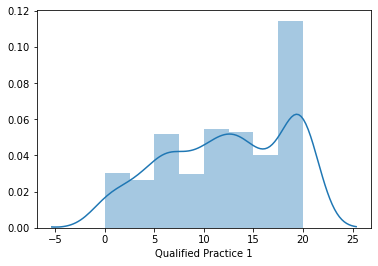

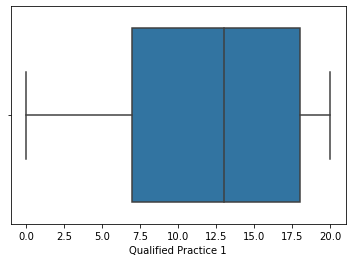

----------------------------------------
Feature Name: Partial Task
Mean: 17.89409984871407
Median: 18.0
Standard Deviation: 2.1357657733234685
Minimum: 0.0
Maximum: 20.0
Skewness: -3.7954802882639673
Kurtosis: 28.171000611134698


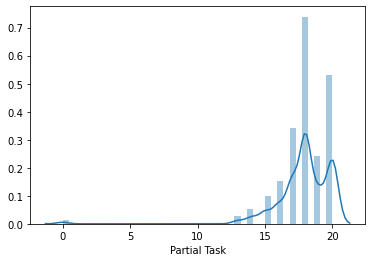

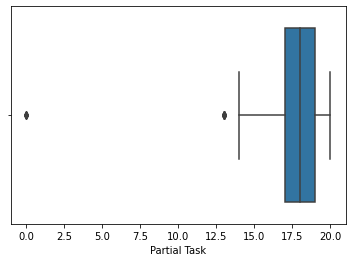

----------------------------------------


In [13]:
# Univariate analysis for numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns
for col in num_cols:
    print('Feature Name:', col)
    print('Mean:', df[col].mean())
    print('Median:', df[col].median())
    print('Standard Deviation:', df[col].std())
    print('Minimum:', df[col].min())
    print('Maximum:', df[col].max())
    print('Skewness:', df[col].skew())
    print('Kurtosis:', df[col].kurtosis())
    sns.distplot(df[col], kde=True)
    plt.show()
    sns.boxplot(df[col])
    plt.show()
    print('----------------------------------------')

In [14]:
#Observations
#- Qualififed Practice 1 and 2 seems normally distributed with no presence of outliers.
#- Partial Task seems negatively skewed with presence of outliers. This indicate more students tend to achieve higher scores.
#- Midterm Exam seems normally distributed with no presence of outliers.
#- Final Task seems negatively skewed but no presence of outliers can be observed.
#- Participation in Class seems negatively skewed with presence of outliers. A high number of students can be observed with next to zero participation.
#- Final Exam seems normally distributed with no presence of outliers.
#- Linguistic Comprehension and Mathematics seems negatively skewed with presence of outliers.
#- Output is normally distributed with no outliers.

# Univariate Analysis of Categorical Features

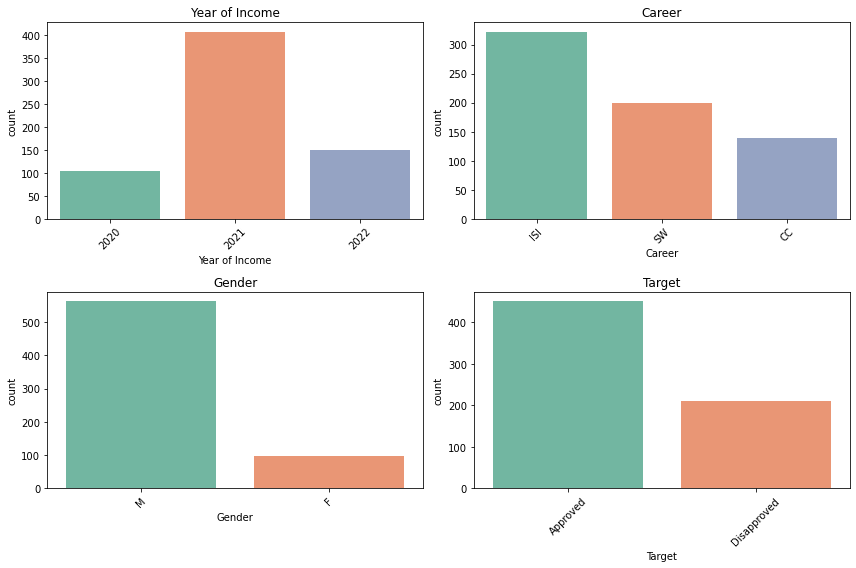

In [15]:
cat_cols = df.select_dtypes(include=['object']).columns

plot_count = 1
plt.figure(figsize = (12,8))
for col in cat_cols:
    plt.subplot(2, 2, plot_count)
    plt.gca().set_title(col)
    sns.countplot(x=col, data=df, palette='Set2')
    plt.xticks(rotation=45)
    plot_count += 1
plt.tight_layout()
plt.show()

Observations:
- Imbalanced distribution for Year of Income and Sex.
- Target Variable, i.e., Target is balanced.

##### Multivariate Analysis of Categorical Features

##### Multivariate Analysis of Numerical Features

In [16]:
# label encode target variable using map
df['Target'] = df['Target'].map({'Disapproved': 0, 'Approved': 1})

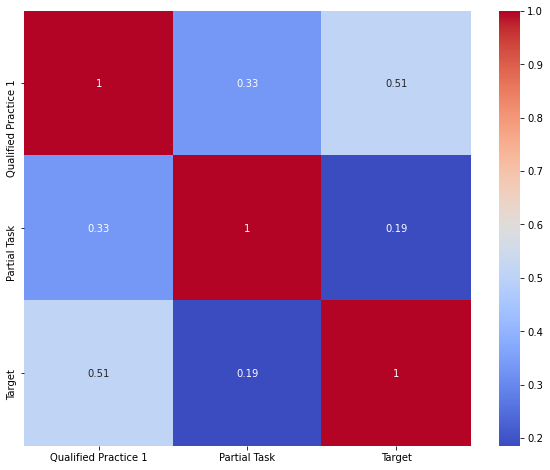

In [17]:
# correlation heatmap for numerical columns
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

##### Data Augmentation (GAN)

In [18]:
# label encode categorical columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [19]:
df

,Year of Income,Career,Gender,Qualified Practice 1,Partial Task,Target
0,2,1,1,9,19.0,1
1,2,1,0,15,20.0,1
2,2,1,1,6,0.0,0
3,2,1,1,20,20.0,1
4,2,1,1,6,16.0,0
...,...,...,...,...,...,...
662,1,2,1,19,18.0,1
663,1,2,1,11,18.0,1
664,1,2,1,18,18.0,1
665,1,2,1,18,19.0,1


In [20]:
# seperate 20% of data for testing
X = df.drop('Target', axis=1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
X_train

,Year of Income,Career,Gender,Qualified Practice 1,Partial Task
532,2,1,1,15,19.0
333,1,2,1,16,18.0
556,2,1,0,14,20.0
662,1,2,1,19,18.0
457,1,2,1,10,15.0
...,...,...,...,...,...
352,1,0,1,3,19.0
372,0,1,1,12,18.0
423,0,1,0,18,18.0
650,1,0,1,14,18.0


In [22]:
# scale data
#scaler = MinMaxScaler(feature_range=(-1, 1))
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [23]:
def create_generator(input_dim, num_classes):
    input_noise = Input(shape=(input_dim,))
    input_label = Input(shape=(1,))
    x = Concatenate()([input_noise, input_label])

    model = Sequential()
    model.add(Dense(128, input_dim=input_dim + num_classes))
    model.add(LeakyReLU(0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(256))
    model.add(LeakyReLU(0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(np.prod(X_train.shape[1:]), activation='tanh'))

    x = model(x)
    return Model([input_noise, input_label], x)

In [24]:
def create_discriminator():
    input_data = Input(shape=X_train.shape[1:])
    input_label = Input(shape=(1,))
    x = Concatenate()([input_data, input_label])

    model = Sequential()
    model.add(Dense(256, input_dim=X_train.shape[1] + 1))
    model.add(LeakyReLU(0.2))
    model.add(Dense(128))
    model.add(LeakyReLU(0.2))
    model.add(Dense(1, activation='sigmoid'))

    x = model(x)
    return Model([input_data, input_label], x)

In [25]:
def train_gan(epochs, batch_size):
    half_batch = int(batch_size / 2)

    for epoch in range(epochs):
        # Train discriminator
        idx = np.random.randint(0, X_train.shape[0], half_batch)
        real_samples = X_train.iloc[idx]
        real_labels = y.values[idx]

        noise = np.random.normal(0, 1, (half_batch, 100))
        synthetic_labels = 1 - real_labels
        synthetic_samples = generator.predict([noise, synthetic_labels])

        d_loss_real = discriminator.train_on_batch([real_samples, real_labels], np.ones(half_batch))
        d_loss_synthetic = discriminator.train_on_batch([synthetic_samples, synthetic_labels], np.zeros(half_batch))

        d_loss = 0.5 * np.add(d_loss_real, d_loss_synthetic)

        # Train generator
        noise = np.random.normal(0, 1, (batch_size, 100))
        sampled_labels = np.random.randint(0, 2, batch_size)
        g_loss = combined.train_on_batch([noise, sampled_labels], np.ones(batch_size))

        print(f"Epoch {epoch}: [D loss: {d_loss}, acc: {0.5 * (d_loss_real[1] + d_loss_synthetic[1])}] [G loss: {g_loss}]")

In [26]:
generator = create_generator(100, 1)
discriminator = create_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.001, 0.8), metrics=['accuracy'])

In [27]:
# Freeze the discriminator for generator training
discriminator.trainable = False
gan_input_noise = Input(shape=(100,))
gan_input_label = Input(shape=(1,))
x = generator([gan_input_noise, gan_input_label])
gan_output = discriminator([x, gan_input_label])
combined = Model([gan_input_noise, gan_input_label], gan_output)
combined.compile(loss='binary_crossentropy', optimizer=Adam(0.001, 0.8))

In [28]:
X_train

,Year of Income,Career,Gender,Qualified Practice 1,Partial Task
532,2,1,1,15,19.0
333,1,2,1,16,18.0
556,2,1,0,14,20.0
662,1,2,1,19,18.0
457,1,2,1,10,15.0
...,...,...,...,...,...
352,1,0,1,3,19.0
372,0,1,1,12,18.0
423,0,1,0,18,18.0
650,1,0,1,14,18.0


In [29]:
train_gan(epochs=10000, batch_size=32)

Epoch 0: [D loss: [0.40325889 0.9375    ], acc: 0.9375] [G loss: 0.7801494002342224]
Epoch 1: [D loss: [0.30381431 0.90625   ], acc: 0.90625] [G loss: 0.7946139574050903]
Epoch 2: [D loss: [0.32698361 0.75      ], acc: 0.75] [G loss: 0.8610783815383911]
Epoch 3: [D loss: [0.28406264 0.90625   ], acc: 0.90625] [G loss: 0.9585631489753723]
Epoch 4: [D loss: [0.24079655 0.96875   ], acc: 0.96875] [G loss: 0.9999593496322632]
Epoch 5: [D loss: [0.26871453 0.9375    ], acc: 0.9375] [G loss: 1.1207107305526733]
Epoch 6: [D loss: [0.24622327 0.90625   ], acc: 0.90625] [G loss: 1.2219818830490112]
Epoch 7: [D loss: [0.23057904 0.9375    ], acc: 0.9375] [G loss: 1.3381145000457764]
Epoch 8: [D loss: [0.20561327 0.96875   ], acc: 0.96875] [G loss: 1.3875715732574463]
Epoch 9: [D loss: [0.15230469 1.        ], acc: 1.0] [G loss: 1.4970003366470337]
Epoch 10: [D loss: [0.15666787 1.        ], acc: 1.0] [G loss: 1.603874921798706]
Epoch 11: [D loss: [0.16219579 0.9375    ], acc: 0.9375] [G loss: 1.

Epoch 100: [D loss: [0.00312645 1.        ], acc: 1.0] [G loss: 6.033514976501465]
Epoch 101: [D loss: [0.00215365 1.        ], acc: 1.0] [G loss: 6.0649919509887695]
Epoch 102: [D loss: [0.00280436 1.        ], acc: 1.0] [G loss: 6.041571140289307]
Epoch 103: [D loss: [0.09982369 0.96875   ], acc: 0.96875] [G loss: 5.839197635650635]
Epoch 104: [D loss: [0.00521964 1.        ], acc: 1.0] [G loss: 5.4475812911987305]
Epoch 105: [D loss: [0.00540833 1.        ], acc: 1.0] [G loss: 5.203466892242432]
Epoch 106: [D loss: [0.00742697 1.        ], acc: 1.0] [G loss: 5.085597991943359]
Epoch 107: [D loss: [0.00552388 1.        ], acc: 1.0] [G loss: 5.373301029205322]
Epoch 108: [D loss: [0.00641439 1.        ], acc: 1.0] [G loss: 5.167612075805664]
Epoch 109: [D loss: [0.00390214 1.        ], acc: 1.0] [G loss: 5.092493057250977]
Epoch 110: [D loss: [0.00526079 1.        ], acc: 1.0] [G loss: 5.587894916534424]
Epoch 111: [D loss: [0.00379236 1.        ], acc: 1.0] [G loss: 5.475454807281494

Epoch 199: [D loss: [0.00227086 1.        ], acc: 1.0] [G loss: 5.539377212524414]
Epoch 200: [D loss: [0.00203645 1.        ], acc: 1.0] [G loss: 5.559793949127197]
Epoch 201: [D loss: [0.00176275 1.        ], acc: 1.0] [G loss: 5.667546272277832]
Epoch 202: [D loss: [0.00175084 1.        ], acc: 1.0] [G loss: 5.794784069061279]
Epoch 203: [D loss: [0.00153499 1.        ], acc: 1.0] [G loss: 5.918789863586426]
Epoch 204: [D loss: [0.00141911 1.        ], acc: 1.0] [G loss: 5.931509494781494]
Epoch 205: [D loss: [0.00129927 1.        ], acc: 1.0] [G loss: 6.048877716064453]
Epoch 206: [D loss: [0.00113403 1.        ], acc: 1.0] [G loss: 6.15107536315918]
Epoch 207: [D loss: [0.00525382 1.        ], acc: 1.0] [G loss: 6.1313652992248535]
Epoch 208: [D loss: [0.00128263 1.        ], acc: 1.0] [G loss: 6.11625862121582]
Epoch 209: [D loss: [0.00120349 1.        ], acc: 1.0] [G loss: 6.115622520446777]
Epoch 210: [D loss: [0.00111671 1.        ], acc: 1.0] [G loss: 6.14776611328125]
Epoch 

Epoch 296: [D loss: [9.53004332e-04 1.00000000e+00], acc: 1.0] [G loss: 6.704358100891113]
Epoch 297: [D loss: [7.88055739e-04 1.00000000e+00], acc: 1.0] [G loss: 6.543885231018066]
Epoch 298: [D loss: [7.90532067e-04 1.00000000e+00], acc: 1.0] [G loss: 6.585244178771973]
Epoch 299: [D loss: [5.63571601e-04 1.00000000e+00], acc: 1.0] [G loss: 6.606260299682617]
Epoch 300: [D loss: [6.27373483e-04 1.00000000e+00], acc: 1.0] [G loss: 6.757181644439697]
Epoch 301: [D loss: [5.825961e-04 1.000000e+00], acc: 1.0] [G loss: 6.845077037811279]
Epoch 302: [D loss: [7.93051076e-04 1.00000000e+00], acc: 1.0] [G loss: 6.720090866088867]
Epoch 303: [D loss: [7.67640973e-04 1.00000000e+00], acc: 1.0] [G loss: 6.760843276977539]
Epoch 304: [D loss: [6.94839531e-04 1.00000000e+00], acc: 1.0] [G loss: 6.817165374755859]
Epoch 305: [D loss: [7.16911451e-04 1.00000000e+00], acc: 1.0] [G loss: 7.01522970199585]
Epoch 306: [D loss: [5.52828664e-04 1.00000000e+00], acc: 1.0] [G loss: 7.015476226806641]
Epoc

Epoch 392: [D loss: [0.00219557 1.        ], acc: 1.0] [G loss: 6.123499393463135]
Epoch 393: [D loss: [0.00221037 1.        ], acc: 1.0] [G loss: 5.5119171142578125]
Epoch 394: [D loss: [0.00340413 1.        ], acc: 1.0] [G loss: 5.596805572509766]
Epoch 395: [D loss: [0.0018509 1.       ], acc: 1.0] [G loss: 5.718300819396973]
Epoch 396: [D loss: [0.00256858 1.        ], acc: 1.0] [G loss: 5.603263854980469]
Epoch 397: [D loss: [0.00177273 1.        ], acc: 1.0] [G loss: 5.661470413208008]
Epoch 398: [D loss: [0.00339893 1.        ], acc: 1.0] [G loss: 5.92696475982666]
Epoch 399: [D loss: [0.00207096 1.        ], acc: 1.0] [G loss: 5.9705705642700195]
Epoch 400: [D loss: [7.9998655e-04 1.0000000e+00], acc: 1.0] [G loss: 6.1955671310424805]
Epoch 401: [D loss: [0.00123112 1.        ], acc: 1.0] [G loss: 6.357126712799072]
Epoch 402: [D loss: [0.00200335 1.        ], acc: 1.0] [G loss: 6.515217304229736]
Epoch 403: [D loss: [8.51393922e-04 1.00000000e+00], acc: 1.0] [G loss: 6.7182607

Epoch 489: [D loss: [0.00127167 1.        ], acc: 1.0] [G loss: 6.135986328125]
Epoch 490: [D loss: [8.98234637e-04 1.00000000e+00], acc: 1.0] [G loss: 6.146651744842529]
Epoch 491: [D loss: [0.00105143 1.        ], acc: 1.0] [G loss: 6.848522663116455]
Epoch 492: [D loss: [5.22369538e-04 1.00000000e+00], acc: 1.0] [G loss: 6.787778854370117]
Epoch 493: [D loss: [6.63164655e-04 1.00000000e+00], acc: 1.0] [G loss: 7.230803489685059]
Epoch 494: [D loss: [6.8871079e-04 1.0000000e+00], acc: 1.0] [G loss: 6.705024719238281]
Epoch 495: [D loss: [0.00107759 1.        ], acc: 1.0] [G loss: 7.316667556762695]
Epoch 496: [D loss: [8.29481901e-04 1.00000000e+00], acc: 1.0] [G loss: 7.188101768493652]
Epoch 497: [D loss: [6.46922451e-04 1.00000000e+00], acc: 1.0] [G loss: 7.3844428062438965]
Epoch 498: [D loss: [6.11059752e-04 1.00000000e+00], acc: 1.0] [G loss: 7.460400581359863]
Epoch 499: [D loss: [3.99003562e-04 1.00000000e+00], acc: 1.0] [G loss: 7.371203422546387]
Epoch 500: [D loss: [6.7119

Epoch 583: [D loss: [1.72525617e-04 1.00000000e+00], acc: 1.0] [G loss: 8.240676879882812]
Epoch 584: [D loss: [3.33087762e-04 1.00000000e+00], acc: 1.0] [G loss: 7.979263782501221]
Epoch 585: [D loss: [2.42717078e-04 1.00000000e+00], acc: 1.0] [G loss: 8.075631141662598]
Epoch 586: [D loss: [3.10090864e-04 1.00000000e+00], acc: 1.0] [G loss: 8.520198822021484]
Epoch 587: [D loss: [0.18485673 0.96875   ], acc: 0.96875] [G loss: 7.361396312713623]
Epoch 588: [D loss: [0.00171119 1.        ], acc: 1.0] [G loss: 6.3908891677856445]
Epoch 589: [D loss: [0.00497201 1.        ], acc: 1.0] [G loss: 6.000555992126465]
Epoch 590: [D loss: [0.00452633 1.        ], acc: 1.0] [G loss: 6.090263843536377]
Epoch 591: [D loss: [0.00343686 1.        ], acc: 1.0] [G loss: 5.722344398498535]
Epoch 592: [D loss: [0.00122474 1.        ], acc: 1.0] [G loss: 6.225714683532715]
Epoch 593: [D loss: [0.00253086 1.        ], acc: 1.0] [G loss: 6.968738555908203]
Epoch 594: [D loss: [0.00120751 1.        ], acc: 

Epoch 677: [D loss: [4.59080845e-04 1.00000000e+00], acc: 1.0] [G loss: 8.032638549804688]
Epoch 678: [D loss: [1.91008068e-04 1.00000000e+00], acc: 1.0] [G loss: 7.612545967102051]
Epoch 679: [D loss: [3.00330216e-04 1.00000000e+00], acc: 1.0] [G loss: 7.406317710876465]
Epoch 680: [D loss: [2.7868634e-04 1.0000000e+00], acc: 1.0] [G loss: 8.236581802368164]
Epoch 681: [D loss: [3.34222272e-04 1.00000000e+00], acc: 1.0] [G loss: 7.892518043518066]
Epoch 682: [D loss: [3.20635221e-04 1.00000000e+00], acc: 1.0] [G loss: 8.157350540161133]
Epoch 683: [D loss: [2.6266393e-04 1.0000000e+00], acc: 1.0] [G loss: 8.24245548248291]
Epoch 684: [D loss: [0.15939622 0.96875   ], acc: 0.96875] [G loss: 7.432657241821289]
Epoch 685: [D loss: [0.00165891 1.        ], acc: 1.0] [G loss: 6.463426113128662]
Epoch 686: [D loss: [0.00162139 1.        ], acc: 1.0] [G loss: 6.363699436187744]
Epoch 687: [D loss: [0.00379308 1.        ], acc: 1.0] [G loss: 5.823139667510986]
Epoch 688: [D loss: [0.00285263 

Epoch 768: [D loss: [7.38915499e-04 1.00000000e+00], acc: 1.0] [G loss: 7.18901252746582]
Epoch 769: [D loss: [0.00182602 1.        ], acc: 1.0] [G loss: 6.524745941162109]
Epoch 770: [D loss: [0.00388032 1.        ], acc: 1.0] [G loss: 6.1285505294799805]
Epoch 771: [D loss: [0.00106942 1.        ], acc: 1.0] [G loss: 6.654929161071777]
Epoch 772: [D loss: [0.00365376 1.        ], acc: 1.0] [G loss: 6.1700286865234375]
Epoch 773: [D loss: [0.00197346 1.        ], acc: 1.0] [G loss: 6.544411659240723]
Epoch 774: [D loss: [0.00238709 1.        ], acc: 1.0] [G loss: 6.9890642166137695]
Epoch 775: [D loss: [9.76765338e-04 1.00000000e+00], acc: 1.0] [G loss: 6.683596134185791]
Epoch 776: [D loss: [0.00109302 1.        ], acc: 1.0] [G loss: 6.98593282699585]
Epoch 777: [D loss: [0.00105481 1.        ], acc: 1.0] [G loss: 6.740980625152588]
Epoch 778: [D loss: [0.12459216 0.96875   ], acc: 0.96875] [G loss: 6.022677898406982]
Epoch 779: [D loss: [0.00502294 1.        ], acc: 1.0] [G loss: 5.

Epoch 861: [D loss: [0.00232925 1.        ], acc: 1.0] [G loss: 5.935061454772949]
Epoch 862: [D loss: [8.57108157e-04 1.00000000e+00], acc: 1.0] [G loss: 6.777792930603027]
Epoch 863: [D loss: [0.00111863 1.        ], acc: 1.0] [G loss: 6.8528242111206055]
Epoch 864: [D loss: [7.96781366e-04 1.00000000e+00], acc: 1.0] [G loss: 6.873452663421631]
Epoch 865: [D loss: [0.00118567 1.        ], acc: 1.0] [G loss: 7.11861515045166]
Epoch 866: [D loss: [4.61912328e-04 1.00000000e+00], acc: 1.0] [G loss: 6.834259986877441]
Epoch 867: [D loss: [8.51282917e-04 1.00000000e+00], acc: 1.0] [G loss: 7.525918483734131]
Epoch 868: [D loss: [4.46844044e-04 1.00000000e+00], acc: 1.0] [G loss: 7.375978946685791]
Epoch 869: [D loss: [6.46727003e-04 1.00000000e+00], acc: 1.0] [G loss: 7.242307662963867]
Epoch 870: [D loss: [3.20564034e-04 1.00000000e+00], acc: 1.0] [G loss: 7.4653730392456055]
Epoch 871: [D loss: [7.36791257e-04 1.00000000e+00], acc: 1.0] [G loss: 7.692546844482422]
Epoch 872: [D loss: [4

Epoch 953: [D loss: [1.7196695e-04 1.0000000e+00], acc: 1.0] [G loss: 9.783140182495117]
Epoch 954: [D loss: [1.04983302e-04 1.00000000e+00], acc: 1.0] [G loss: 9.321971893310547]
Epoch 955: [D loss: [1.03944628e-04 1.00000000e+00], acc: 1.0] [G loss: 9.003506660461426]
Epoch 956: [D loss: [6.62152293e-05 1.00000000e+00], acc: 1.0] [G loss: 9.031815528869629]
Epoch 957: [D loss: [1.08487396e-04 1.00000000e+00], acc: 1.0] [G loss: 9.034639358520508]
Epoch 958: [D loss: [1.43019605e-04 1.00000000e+00], acc: 1.0] [G loss: 8.797393798828125]
Epoch 959: [D loss: [4.65026259e-05 1.00000000e+00], acc: 1.0] [G loss: 8.962982177734375]
Epoch 960: [D loss: [9.71388593e-05 1.00000000e+00], acc: 1.0] [G loss: 9.306529998779297]
Epoch 961: [D loss: [1.20644192e-04 1.00000000e+00], acc: 1.0] [G loss: 9.140172958374023]
Epoch 962: [D loss: [0.4333027 0.9375   ], acc: 0.9375] [G loss: 6.88780403137207]
Epoch 963: [D loss: [0.00547676 1.        ], acc: 1.0] [G loss: 5.735854148864746]
Epoch 964: [D los

Epoch 1047: [D loss: [2.92054666e-04 1.00000000e+00], acc: 1.0] [G loss: 7.8114166259765625]
Epoch 1048: [D loss: [2.17578658e-04 1.00000000e+00], acc: 1.0] [G loss: 8.06137466430664]
Epoch 1049: [D loss: [1.83577439e-04 1.00000000e+00], acc: 1.0] [G loss: 8.40318489074707]
Epoch 1050: [D loss: [3.74728417e-04 1.00000000e+00], acc: 1.0] [G loss: 8.716626167297363]
Epoch 1051: [D loss: [2.07673186e-04 1.00000000e+00], acc: 1.0] [G loss: 8.378524780273438]
Epoch 1052: [D loss: [3.68625229e-04 1.00000000e+00], acc: 1.0] [G loss: 9.182816505432129]
Epoch 1053: [D loss: [1.61048179e-04 1.00000000e+00], acc: 1.0] [G loss: 8.498857498168945]
Epoch 1054: [D loss: [2.87358013e-04 1.00000000e+00], acc: 1.0] [G loss: 8.7174072265625]
Epoch 1055: [D loss: [4.36246035e-04 1.00000000e+00], acc: 1.0] [G loss: 8.432350158691406]
Epoch 1056: [D loss: [2.1293563e-04 1.0000000e+00], acc: 1.0] [G loss: 8.246856689453125]
Epoch 1057: [D loss: [0.18831492 0.96875   ], acc: 0.96875] [G loss: 7.22911262512207

Epoch 1140: [D loss: [0.00426774 1.        ], acc: 1.0] [G loss: 6.22751522064209]
Epoch 1141: [D loss: [0.00207828 1.        ], acc: 1.0] [G loss: 5.916995525360107]
Epoch 1142: [D loss: [0.00228135 1.        ], acc: 1.0] [G loss: 6.626012802124023]
Epoch 1143: [D loss: [9.04910974e-04 1.00000000e+00], acc: 1.0] [G loss: 6.465252876281738]
Epoch 1144: [D loss: [0.00264245 1.        ], acc: 1.0] [G loss: 6.788052558898926]
Epoch 1145: [D loss: [0.00166271 1.        ], acc: 1.0] [G loss: 6.697751045227051]
Epoch 1146: [D loss: [0.00182209 1.        ], acc: 1.0] [G loss: 7.0070037841796875]
Epoch 1147: [D loss: [4.78528747e-04 1.00000000e+00], acc: 1.0] [G loss: 6.453491687774658]
Epoch 1148: [D loss: [0.00137945 1.        ], acc: 1.0] [G loss: 7.672054767608643]
Epoch 1149: [D loss: [0.00172893 1.        ], acc: 1.0] [G loss: 7.704065322875977]
Epoch 1150: [D loss: [0.00117859 1.        ], acc: 1.0] [G loss: 7.801682472229004]
Epoch 1151: [D loss: [9.93545628e-04 1.00000000e+00], acc: 1

Epoch 1232: [D loss: [1.43059176e-04 1.00000000e+00], acc: 1.0] [G loss: 8.926252365112305]
Epoch 1233: [D loss: [1.42675354e-04 1.00000000e+00], acc: 1.0] [G loss: 9.081624031066895]
Epoch 1234: [D loss: [0.23295391 0.96875   ], acc: 0.96875] [G loss: 7.890677452087402]
Epoch 1235: [D loss: [8.17100272e-04 1.00000000e+00], acc: 1.0] [G loss: 7.220608234405518]
Epoch 1236: [D loss: [6.9483534e-04 1.0000000e+00], acc: 1.0] [G loss: 6.867895603179932]
Epoch 1237: [D loss: [0.00137638 1.        ], acc: 1.0] [G loss: 6.557320594787598]
Epoch 1238: [D loss: [0.14575723 0.96875   ], acc: 0.96875] [G loss: 5.828327178955078]
Epoch 1239: [D loss: [0.00760499 1.        ], acc: 1.0] [G loss: 5.471217155456543]
Epoch 1240: [D loss: [0.00646471 1.        ], acc: 1.0] [G loss: 5.43528413772583]
Epoch 1241: [D loss: [0.00790645 1.        ], acc: 1.0] [G loss: 6.103475570678711]
Epoch 1242: [D loss: [0.00764266 1.        ], acc: 1.0] [G loss: 5.967694282531738]
Epoch 1243: [D loss: [0.00441549 1.    

Epoch 1323: [D loss: [0.15295186 0.96875   ], acc: 0.96875] [G loss: 6.176516532897949]
Epoch 1324: [D loss: [0.00714841 1.        ], acc: 1.0] [G loss: 4.676595211029053]
Epoch 1325: [D loss: [0.01092281 1.        ], acc: 1.0] [G loss: 4.738442897796631]
Epoch 1326: [D loss: [0.00776494 1.        ], acc: 1.0] [G loss: 4.529683589935303]
Epoch 1327: [D loss: [0.0099398 1.       ], acc: 1.0] [G loss: 4.963626861572266]
Epoch 1328: [D loss: [0.00713783 1.        ], acc: 1.0] [G loss: 5.462000846862793]
Epoch 1329: [D loss: [0.009015 1.      ], acc: 1.0] [G loss: 5.228968620300293]
Epoch 1330: [D loss: [0.0014151 1.       ], acc: 1.0] [G loss: 6.022940158843994]
Epoch 1331: [D loss: [0.00327287 1.        ], acc: 1.0] [G loss: 6.169132232666016]
Epoch 1332: [D loss: [0.00383801 1.        ], acc: 1.0] [G loss: 6.504235744476318]
Epoch 1333: [D loss: [0.00210935 1.        ], acc: 1.0] [G loss: 7.101091384887695]
Epoch 1334: [D loss: [0.00135597 1.        ], acc: 1.0] [G loss: 6.7057809829711

Epoch 1417: [D loss: [7.46970965e-04 1.00000000e+00], acc: 1.0] [G loss: 7.6003875732421875]
Epoch 1418: [D loss: [7.93528629e-04 1.00000000e+00], acc: 1.0] [G loss: 8.11704158782959]
Epoch 1419: [D loss: [3.01660569e-04 1.00000000e+00], acc: 1.0] [G loss: 7.707491874694824]
Epoch 1420: [D loss: [6.37374602e-04 1.00000000e+00], acc: 1.0] [G loss: 7.529809951782227]
Epoch 1421: [D loss: [7.70069228e-04 1.00000000e+00], acc: 1.0] [G loss: 7.684183120727539]
Epoch 1422: [D loss: [6.28536327e-04 1.00000000e+00], acc: 1.0] [G loss: 8.196037292480469]
Epoch 1423: [D loss: [3.99765882e-04 1.00000000e+00], acc: 1.0] [G loss: 7.328787803649902]
Epoch 1424: [D loss: [1.69091421e-04 1.00000000e+00], acc: 1.0] [G loss: 7.694308280944824]
Epoch 1425: [D loss: [4.93331585e-04 1.00000000e+00], acc: 1.0] [G loss: 7.513815879821777]
Epoch 1426: [D loss: [4.71537861e-04 1.00000000e+00], acc: 1.0] [G loss: 8.010841369628906]
Epoch 1427: [D loss: [5.82573725e-04 1.00000000e+00], acc: 1.0] [G loss: 8.27357

Epoch 1508: [D loss: [4.2006487e-04 1.0000000e+00], acc: 1.0] [G loss: 8.300980567932129]
Epoch 1509: [D loss: [3.00494477e-04 1.00000000e+00], acc: 1.0] [G loss: 7.884618759155273]
Epoch 1510: [D loss: [2.39322507e-04 1.00000000e+00], acc: 1.0] [G loss: 8.587770462036133]
Epoch 1511: [D loss: [4.37860764e-04 1.00000000e+00], acc: 1.0] [G loss: 8.609371185302734]
Epoch 1512: [D loss: [4.74089787e-04 1.00000000e+00], acc: 1.0] [G loss: 8.522452354431152]
Epoch 1513: [D loss: [4.09110136e-04 1.00000000e+00], acc: 1.0] [G loss: 8.217910766601562]
Epoch 1514: [D loss: [2.50608548e-04 1.00000000e+00], acc: 1.0] [G loss: 7.932189464569092]
Epoch 1515: [D loss: [3.36666624e-04 1.00000000e+00], acc: 1.0] [G loss: 8.391555786132812]
Epoch 1516: [D loss: [2.80289582e-04 1.00000000e+00], acc: 1.0] [G loss: 7.670657157897949]
Epoch 1517: [D loss: [2.30930719e-04 1.00000000e+00], acc: 1.0] [G loss: 8.898504257202148]
Epoch 1518: [D loss: [4.63956766e-04 1.00000000e+00], acc: 1.0] [G loss: 8.0536050

Epoch 1601: [D loss: [0.00168686 1.        ], acc: 1.0] [G loss: 7.001110076904297]
Epoch 1602: [D loss: [4.29280736e-04 1.00000000e+00], acc: 1.0] [G loss: 7.199870586395264]
Epoch 1603: [D loss: [9.01790952e-04 1.00000000e+00], acc: 1.0] [G loss: 7.6365065574646]
Epoch 1604: [D loss: [6.81885694e-04 1.00000000e+00], acc: 1.0] [G loss: 6.751189231872559]
Epoch 1605: [D loss: [6.34129253e-04 1.00000000e+00], acc: 1.0] [G loss: 6.815473556518555]
Epoch 1606: [D loss: [0.00114411 1.        ], acc: 1.0] [G loss: 7.4565534591674805]
Epoch 1607: [D loss: [6.79239281e-04 1.00000000e+00], acc: 1.0] [G loss: 8.37347412109375]
Epoch 1608: [D loss: [0.00112256 1.        ], acc: 1.0] [G loss: 7.468157768249512]
Epoch 1609: [D loss: [3.76320536e-04 1.00000000e+00], acc: 1.0] [G loss: 7.296230792999268]
Epoch 1610: [D loss: [7.73407832e-04 1.00000000e+00], acc: 1.0] [G loss: 8.063094139099121]
Epoch 1611: [D loss: [6.27301572e-04 1.00000000e+00], acc: 1.0] [G loss: 7.758256912231445]
Epoch 1612: [D

Epoch 1693: [D loss: [3.27791496e-04 1.00000000e+00], acc: 1.0] [G loss: 7.920188903808594]
Epoch 1694: [D loss: [3.74959316e-04 1.00000000e+00], acc: 1.0] [G loss: 7.956352710723877]
Epoch 1695: [D loss: [4.72644139e-04 1.00000000e+00], acc: 1.0] [G loss: 8.554967880249023]
Epoch 1696: [D loss: [3.45340436e-04 1.00000000e+00], acc: 1.0] [G loss: 8.243999481201172]
Epoch 1697: [D loss: [4.39347749e-04 1.00000000e+00], acc: 1.0] [G loss: 8.056573867797852]
Epoch 1698: [D loss: [3.20789195e-04 1.00000000e+00], acc: 1.0] [G loss: 7.760581970214844]
Epoch 1699: [D loss: [3.10411793e-04 1.00000000e+00], acc: 1.0] [G loss: 8.116693496704102]
Epoch 1700: [D loss: [3.93931167e-04 1.00000000e+00], acc: 1.0] [G loss: 8.710514068603516]
Epoch 1701: [D loss: [3.41815983e-04 1.00000000e+00], acc: 1.0] [G loss: 8.059640884399414]
Epoch 1702: [D loss: [1.97535921e-04 1.00000000e+00], acc: 1.0] [G loss: 7.979089736938477]
Epoch 1703: [D loss: [0.2062106 0.96875  ], acc: 0.96875] [G loss: 7.56301259994

Epoch 1786: [D loss: [3.95509399e-04 1.00000000e+00], acc: 1.0] [G loss: 8.344123840332031]
Epoch 1787: [D loss: [2.55272549e-04 1.00000000e+00], acc: 1.0] [G loss: 7.906742095947266]
Epoch 1788: [D loss: [2.10676518e-04 1.00000000e+00], acc: 1.0] [G loss: 8.289977073669434]
Epoch 1789: [D loss: [2.84093668e-04 1.00000000e+00], acc: 1.0] [G loss: 8.540361404418945]
Epoch 1790: [D loss: [1.98712246e-04 1.00000000e+00], acc: 1.0] [G loss: 8.799995422363281]
Epoch 1791: [D loss: [1.94442153e-04 1.00000000e+00], acc: 1.0] [G loss: 8.937017440795898]
Epoch 1792: [D loss: [2.96194832e-04 1.00000000e+00], acc: 1.0] [G loss: 8.612791061401367]
Epoch 1793: [D loss: [3.49576914e-04 1.00000000e+00], acc: 1.0] [G loss: 8.749855995178223]
Epoch 1794: [D loss: [1.79884251e-04 1.00000000e+00], acc: 1.0] [G loss: 8.88393783569336]
Epoch 1795: [D loss: [2.35553723e-04 1.00000000e+00], acc: 1.0] [G loss: 9.019777297973633]
Epoch 1796: [D loss: [1.97524312e-04 1.00000000e+00], acc: 1.0] [G loss: 9.167841

Epoch 1882: [D loss: [7.43125673e-04 1.00000000e+00], acc: 1.0] [G loss: 7.053332328796387]
Epoch 1883: [D loss: [7.97803971e-04 1.00000000e+00], acc: 1.0] [G loss: 7.578131675720215]
Epoch 1884: [D loss: [4.84197789e-04 1.00000000e+00], acc: 1.0] [G loss: 7.275548458099365]
Epoch 1885: [D loss: [4.63381661e-04 1.00000000e+00], acc: 1.0] [G loss: 7.557160377502441]
Epoch 1886: [D loss: [6.89640181e-04 1.00000000e+00], acc: 1.0] [G loss: 7.480937480926514]
Epoch 1887: [D loss: [4.20860195e-04 1.00000000e+00], acc: 1.0] [G loss: 8.123682022094727]
Epoch 1888: [D loss: [4.7754488e-04 1.0000000e+00], acc: 1.0] [G loss: 7.809103012084961]
Epoch 1889: [D loss: [7.55808959e-04 1.00000000e+00], acc: 1.0] [G loss: 8.212170600891113]
Epoch 1890: [D loss: [4.13870159e-04 1.00000000e+00], acc: 1.0] [G loss: 8.487617492675781]
Epoch 1891: [D loss: [4.502675e-04 1.000000e+00], acc: 1.0] [G loss: 8.28653335571289]
Epoch 1892: [D loss: [2.76518281e-04 1.00000000e+00], acc: 1.0] [G loss: 8.201568603515

Epoch 1973: [D loss: [2.82368994e-04 1.00000000e+00], acc: 1.0] [G loss: 8.58758544921875]
Epoch 1974: [D loss: [3.18765833e-04 1.00000000e+00], acc: 1.0] [G loss: 7.9304986000061035]
Epoch 1975: [D loss: [3.52096623e-04 1.00000000e+00], acc: 1.0] [G loss: 8.294705390930176]
Epoch 1976: [D loss: [0.20746936 0.96875   ], acc: 0.96875] [G loss: 7.459077835083008]
Epoch 1977: [D loss: [8.81762334e-04 1.00000000e+00], acc: 1.0] [G loss: 6.856337547302246]
Epoch 1978: [D loss: [0.00151516 1.        ], acc: 1.0] [G loss: 6.694741249084473]
Epoch 1979: [D loss: [0.00136117 1.        ], acc: 1.0] [G loss: 6.324609756469727]
Epoch 1980: [D loss: [0.00208147 1.        ], acc: 1.0] [G loss: 6.378013610839844]
Epoch 1981: [D loss: [0.00211316 1.        ], acc: 1.0] [G loss: 6.745596408843994]
Epoch 1982: [D loss: [0.00121471 1.        ], acc: 1.0] [G loss: 7.131162643432617]
Epoch 1983: [D loss: [0.00222415 1.        ], acc: 1.0] [G loss: 6.593315601348877]
Epoch 1984: [D loss: [0.00229873 1.     

Epoch 2065: [D loss: [2.18077265e-04 1.00000000e+00], acc: 1.0] [G loss: 8.69192886352539]
Epoch 2066: [D loss: [3.29448503e-04 1.00000000e+00], acc: 1.0] [G loss: 9.227009773254395]
Epoch 2067: [D loss: [2.78050709e-04 1.00000000e+00], acc: 1.0] [G loss: 8.620902061462402]
Epoch 2068: [D loss: [0.21046873 0.96875   ], acc: 0.96875] [G loss: 8.193070411682129]
Epoch 2069: [D loss: [8.73494612e-04 1.00000000e+00], acc: 1.0] [G loss: 6.976912975311279]
Epoch 2070: [D loss: [0.00110182 1.        ], acc: 1.0] [G loss: 6.879390716552734]
Epoch 2071: [D loss: [0.00164143 1.        ], acc: 1.0] [G loss: 6.96902322769165]
Epoch 2072: [D loss: [0.00240588 1.        ], acc: 1.0] [G loss: 6.425607681274414]
Epoch 2073: [D loss: [0.00274009 1.        ], acc: 1.0] [G loss: 6.302372932434082]
Epoch 2074: [D loss: [0.00177303 1.        ], acc: 1.0] [G loss: 6.353415489196777]
Epoch 2075: [D loss: [0.00244231 1.        ], acc: 1.0] [G loss: 7.029008865356445]
Epoch 2076: [D loss: [0.15308601 0.96875  

Epoch 2159: [D loss: [3.9482237e-04 1.0000000e+00], acc: 1.0] [G loss: 8.53902530670166]
Epoch 2160: [D loss: [4.70883431e-04 1.00000000e+00], acc: 1.0] [G loss: 8.686569213867188]
Epoch 2161: [D loss: [2.35030371e-04 1.00000000e+00], acc: 1.0] [G loss: 8.71487808227539]
Epoch 2162: [D loss: [2.71597327e-04 1.00000000e+00], acc: 1.0] [G loss: 8.256026268005371]
Epoch 2163: [D loss: [3.88693909e-04 1.00000000e+00], acc: 1.0] [G loss: 8.635748863220215]
Epoch 2164: [D loss: [9.6111944e-05 1.0000000e+00], acc: 1.0] [G loss: 8.171661376953125]
Epoch 2165: [D loss: [4.03187669e-04 1.00000000e+00], acc: 1.0] [G loss: 8.444589614868164]
Epoch 2166: [D loss: [2.03258815e-04 1.00000000e+00], acc: 1.0] [G loss: 8.945032119750977]
Epoch 2167: [D loss: [3.0864915e-04 1.0000000e+00], acc: 1.0] [G loss: 8.357563018798828]
Epoch 2168: [D loss: [2.29424373e-04 1.00000000e+00], acc: 1.0] [G loss: 8.870256423950195]
Epoch 2169: [D loss: [8.33652321e-05 1.00000000e+00], acc: 1.0] [G loss: 9.2640686035156

Epoch 2251: [D loss: [0.0029473 1.       ], acc: 1.0] [G loss: 5.8974738121032715]
Epoch 2252: [D loss: [0.00234591 1.        ], acc: 1.0] [G loss: 6.350472450256348]
Epoch 2253: [D loss: [0.00460417 1.        ], acc: 1.0] [G loss: 6.448493957519531]
Epoch 2254: [D loss: [0.00189403 1.        ], acc: 1.0] [G loss: 6.567435264587402]
Epoch 2255: [D loss: [0.00231998 1.        ], acc: 1.0] [G loss: 6.5551838874816895]
Epoch 2256: [D loss: [9.27610158e-04 1.00000000e+00], acc: 1.0] [G loss: 7.035089492797852]
Epoch 2257: [D loss: [0.00263719 1.        ], acc: 1.0] [G loss: 6.638248443603516]
Epoch 2258: [D loss: [9.7529102e-04 1.0000000e+00], acc: 1.0] [G loss: 6.609775543212891]
Epoch 2259: [D loss: [0.15604108 0.96875   ], acc: 0.96875] [G loss: 7.108949661254883]
Epoch 2260: [D loss: [0.00186283 1.        ], acc: 1.0] [G loss: 6.701313018798828]
Epoch 2261: [D loss: [0.00444745 1.        ], acc: 1.0] [G loss: 6.325579643249512]
Epoch 2262: [D loss: [0.00360744 1.        ], acc: 1.0] [G

Epoch 2346: [D loss: [9.04385643e-04 1.00000000e+00], acc: 1.0] [G loss: 7.146687030792236]
Epoch 2347: [D loss: [8.62562345e-04 1.00000000e+00], acc: 1.0] [G loss: 7.819011688232422]
Epoch 2348: [D loss: [0.00102083 1.        ], acc: 1.0] [G loss: 7.880453586578369]
Epoch 2349: [D loss: [0.17873253 0.96875   ], acc: 0.96875] [G loss: 7.387531280517578]
Epoch 2350: [D loss: [0.00204537 1.        ], acc: 1.0] [G loss: 6.179325103759766]
Epoch 2351: [D loss: [0.00233562 1.        ], acc: 1.0] [G loss: 7.114212512969971]
Epoch 2352: [D loss: [0.00261074 1.        ], acc: 1.0] [G loss: 6.30632209777832]
Epoch 2353: [D loss: [0.00233019 1.        ], acc: 1.0] [G loss: 6.559810638427734]
Epoch 2354: [D loss: [0.14132265 0.96875   ], acc: 0.96875] [G loss: 5.950092792510986]
Epoch 2355: [D loss: [0.00440914 1.        ], acc: 1.0] [G loss: 5.583428859710693]
Epoch 2356: [D loss: [0.00350873 1.        ], acc: 1.0] [G loss: 5.74851131439209]
Epoch 2357: [D loss: [0.00537091 1.        ], acc: 1.0

Epoch 2439: [D loss: [3.18497045e-04 1.00000000e+00], acc: 1.0] [G loss: 7.687049865722656]
Epoch 2440: [D loss: [5.24858246e-04 1.00000000e+00], acc: 1.0] [G loss: 8.234176635742188]
Epoch 2441: [D loss: [2.28458245e-04 1.00000000e+00], acc: 1.0] [G loss: 8.132012367248535]
Epoch 2442: [D loss: [3.55187554e-04 1.00000000e+00], acc: 1.0] [G loss: 8.419807434082031]
Epoch 2443: [D loss: [3.47875175e-04 1.00000000e+00], acc: 1.0] [G loss: 7.805554389953613]
Epoch 2444: [D loss: [5.90203548e-04 1.00000000e+00], acc: 1.0] [G loss: 8.73951244354248]
Epoch 2445: [D loss: [2.63544088e-04 1.00000000e+00], acc: 1.0] [G loss: 8.375517845153809]
Epoch 2446: [D loss: [1.96051661e-04 1.00000000e+00], acc: 1.0] [G loss: 8.784357070922852]
Epoch 2447: [D loss: [3.10565697e-04 1.00000000e+00], acc: 1.0] [G loss: 8.55831527709961]
Epoch 2448: [D loss: [4.12370453e-04 1.00000000e+00], acc: 1.0] [G loss: 8.446386337280273]
Epoch 2449: [D loss: [4.00566246e-04 1.00000000e+00], acc: 1.0] [G loss: 8.3440532

Epoch 2530: [D loss: [4.48351094e-04 1.00000000e+00], acc: 1.0] [G loss: 8.603719711303711]
Epoch 2531: [D loss: [3.76982527e-04 1.00000000e+00], acc: 1.0] [G loss: 8.735967636108398]
Epoch 2532: [D loss: [3.64596143e-04 1.00000000e+00], acc: 1.0] [G loss: 8.52886962890625]
Epoch 2533: [D loss: [4.6308289e-04 1.0000000e+00], acc: 1.0] [G loss: 8.206361770629883]
Epoch 2534: [D loss: [2.35209895e-04 1.00000000e+00], acc: 1.0] [G loss: 7.8894572257995605]
Epoch 2535: [D loss: [0.19910362 0.96875   ], acc: 0.96875] [G loss: 7.155797958374023]
Epoch 2536: [D loss: [0.00115878 1.        ], acc: 1.0] [G loss: 6.963808536529541]
Epoch 2537: [D loss: [0.00231857 1.        ], acc: 1.0] [G loss: 6.971895217895508]
Epoch 2538: [D loss: [0.00168503 1.        ], acc: 1.0] [G loss: 6.601034164428711]
Epoch 2539: [D loss: [0.00239361 1.        ], acc: 1.0] [G loss: 6.577389717102051]
Epoch 2540: [D loss: [0.00238672 1.        ], acc: 1.0] [G loss: 6.715361595153809]
Epoch 2541: [D loss: [0.0022829 1.

Epoch 2626: [D loss: [4.32960131e-04 1.00000000e+00], acc: 1.0] [G loss: 8.235021591186523]
Epoch 2627: [D loss: [3.32478472e-04 1.00000000e+00], acc: 1.0] [G loss: 8.54690170288086]
Epoch 2628: [D loss: [3.19064074e-04 1.00000000e+00], acc: 1.0] [G loss: 9.27558422088623]
Epoch 2629: [D loss: [3.03830486e-04 1.00000000e+00], acc: 1.0] [G loss: 8.617246627807617]
Epoch 2630: [D loss: [2.56478611e-04 1.00000000e+00], acc: 1.0] [G loss: 9.204907417297363]
Epoch 2631: [D loss: [2.45797094e-04 1.00000000e+00], acc: 1.0] [G loss: 9.498540878295898]
Epoch 2632: [D loss: [1.38228603e-04 1.00000000e+00], acc: 1.0] [G loss: 8.565231323242188]
Epoch 2633: [D loss: [2.61009066e-04 1.00000000e+00], acc: 1.0] [G loss: 9.004863739013672]
Epoch 2634: [D loss: [1.29696976e-04 1.00000000e+00], acc: 1.0] [G loss: 9.294581413269043]
Epoch 2635: [D loss: [2.13615457e-04 1.00000000e+00], acc: 1.0] [G loss: 8.524604797363281]
Epoch 2636: [D loss: [2.07482342e-04 1.00000000e+00], acc: 1.0] [G loss: 8.9635047

Epoch 2720: [D loss: [0.00114777 1.        ], acc: 1.0] [G loss: 6.071468353271484]
Epoch 2721: [D loss: [0.00226265 1.        ], acc: 1.0] [G loss: 6.619482040405273]
Epoch 2722: [D loss: [0.00256423 1.        ], acc: 1.0] [G loss: 6.803275108337402]
Epoch 2723: [D loss: [0.00239831 1.        ], acc: 1.0] [G loss: 6.47574520111084]
Epoch 2724: [D loss: [0.00221168 1.        ], acc: 1.0] [G loss: 6.161434173583984]
Epoch 2725: [D loss: [0.00257439 1.        ], acc: 1.0] [G loss: 6.3994598388671875]
Epoch 2726: [D loss: [0.0013049 1.       ], acc: 1.0] [G loss: 6.636991024017334]
Epoch 2727: [D loss: [0.00186887 1.        ], acc: 1.0] [G loss: 7.142139434814453]
Epoch 2728: [D loss: [6.64091639e-04 1.00000000e+00], acc: 1.0] [G loss: 7.774204730987549]
Epoch 2729: [D loss: [0.0021601 1.       ], acc: 1.0] [G loss: 6.634220123291016]
Epoch 2730: [D loss: [0.00144492 1.        ], acc: 1.0] [G loss: 7.67990779876709]
Epoch 2731: [D loss: [6.77103993e-04 1.00000000e+00], acc: 1.0] [G loss: 

Epoch 2815: [D loss: [0.00135641 1.        ], acc: 1.0] [G loss: 7.84627103805542]
Epoch 2816: [D loss: [0.00125937 1.        ], acc: 1.0] [G loss: 6.920349597930908]
Epoch 2817: [D loss: [0.00133431 1.        ], acc: 1.0] [G loss: 7.7079758644104]
Epoch 2818: [D loss: [0.00108799 1.        ], acc: 1.0] [G loss: 7.778313159942627]
Epoch 2819: [D loss: [8.71749654e-04 1.00000000e+00], acc: 1.0] [G loss: 7.702014446258545]
Epoch 2820: [D loss: [4.29098038e-04 1.00000000e+00], acc: 1.0] [G loss: 7.90091609954834]
Epoch 2821: [D loss: [0.00103287 1.        ], acc: 1.0] [G loss: 7.520092487335205]
Epoch 2822: [D loss: [7.39628305e-04 1.00000000e+00], acc: 1.0] [G loss: 8.002718925476074]
Epoch 2823: [D loss: [8.14998523e-04 1.00000000e+00], acc: 1.0] [G loss: 7.915765762329102]
Epoch 2824: [D loss: [9.95264274e-04 1.00000000e+00], acc: 1.0] [G loss: 7.533376693725586]
Epoch 2825: [D loss: [7.33955935e-04 1.00000000e+00], acc: 1.0] [G loss: 8.15449333190918]
Epoch 2826: [D loss: [5.01693203e

Epoch 2904: [D loss: [5.58057947e-05 1.00000000e+00], acc: 1.0] [G loss: 10.499137878417969]
Epoch 2905: [D loss: [9.38972581e-05 1.00000000e+00], acc: 1.0] [G loss: 9.32701301574707]
Epoch 2906: [D loss: [6.60765858e-05 1.00000000e+00], acc: 1.0] [G loss: 10.239328384399414]
Epoch 2907: [D loss: [4.07916707e-05 1.00000000e+00], acc: 1.0] [G loss: 9.72816276550293]
Epoch 2908: [D loss: [0.24474931 0.96875   ], acc: 0.96875] [G loss: 8.806889533996582]
Epoch 2909: [D loss: [3.2131361e-04 1.0000000e+00], acc: 1.0] [G loss: 7.966986656188965]
Epoch 2910: [D loss: [7.95879082e-04 1.00000000e+00], acc: 1.0] [G loss: 7.559902667999268]
Epoch 2911: [D loss: [8.84225249e-04 1.00000000e+00], acc: 1.0] [G loss: 6.952071666717529]
Epoch 2912: [D loss: [0.00159491 1.        ], acc: 1.0] [G loss: 6.922780990600586]
Epoch 2913: [D loss: [0.00150501 1.        ], acc: 1.0] [G loss: 6.979943752288818]
Epoch 2914: [D loss: [0.00131516 1.        ], acc: 1.0] [G loss: 6.965195655822754]
Epoch 2915: [D los

Epoch 2996: [D loss: [0.00118216 1.        ], acc: 1.0] [G loss: 7.278373718261719]
Epoch 2997: [D loss: [9.23792166e-04 1.00000000e+00], acc: 1.0] [G loss: 7.466182708740234]
Epoch 2998: [D loss: [8.72814887e-04 1.00000000e+00], acc: 1.0] [G loss: 7.024423599243164]
Epoch 2999: [D loss: [0.00113567 1.        ], acc: 1.0] [G loss: 7.334025859832764]
Epoch 3000: [D loss: [9.19797882e-04 1.00000000e+00], acc: 1.0] [G loss: 7.63820743560791]
Epoch 3001: [D loss: [0.00127631 1.        ], acc: 1.0] [G loss: 7.446830749511719]
Epoch 3002: [D loss: [8.06864014e-04 1.00000000e+00], acc: 1.0] [G loss: 6.886716842651367]
Epoch 3003: [D loss: [0.17326612 0.96875   ], acc: 0.96875] [G loss: 6.684808731079102]
Epoch 3004: [D loss: [0.00172955 1.        ], acc: 1.0] [G loss: 6.497292995452881]
Epoch 3005: [D loss: [0.00186989 1.        ], acc: 1.0] [G loss: 6.574000358581543]
Epoch 3006: [D loss: [0.00331553 1.        ], acc: 1.0] [G loss: 6.636091232299805]
Epoch 3007: [D loss: [0.00255725 1.      

Epoch 3091: [D loss: [0.00230004 1.        ], acc: 1.0] [G loss: 6.909030914306641]
Epoch 3092: [D loss: [0.00123399 1.        ], acc: 1.0] [G loss: 7.26064395904541]
Epoch 3093: [D loss: [0.00250212 1.        ], acc: 1.0] [G loss: 6.549699306488037]
Epoch 3094: [D loss: [0.00151658 1.        ], acc: 1.0] [G loss: 6.906613826751709]
Epoch 3095: [D loss: [0.00160993 1.        ], acc: 1.0] [G loss: 7.802432537078857]
Epoch 3096: [D loss: [0.00187876 1.        ], acc: 1.0] [G loss: 7.2239861488342285]
Epoch 3097: [D loss: [0.00188953 1.        ], acc: 1.0] [G loss: 7.587773323059082]
Epoch 3098: [D loss: [5.38410517e-04 1.00000000e+00], acc: 1.0] [G loss: 7.01023006439209]
Epoch 3099: [D loss: [0.00141806 1.        ], acc: 1.0] [G loss: 7.354301452636719]
Epoch 3100: [D loss: [0.00102262 1.        ], acc: 1.0] [G loss: 6.900296211242676]
Epoch 3101: [D loss: [0.00120732 1.        ], acc: 1.0] [G loss: 7.242071151733398]
Epoch 3102: [D loss: [8.72851374e-04 1.00000000e+00], acc: 1.0] [G lo

Epoch 3182: [D loss: [3.38825254e-05 1.00000000e+00], acc: 1.0] [G loss: 10.121193885803223]
Epoch 3183: [D loss: [5.21486507e-05 1.00000000e+00], acc: 1.0] [G loss: 9.594173431396484]
Epoch 3184: [D loss: [0.25436698 0.96875   ], acc: 0.96875] [G loss: 8.841002464294434]
Epoch 3185: [D loss: [3.75443387e-04 1.00000000e+00], acc: 1.0] [G loss: 8.171843528747559]
Epoch 3186: [D loss: [6.59557152e-04 1.00000000e+00], acc: 1.0] [G loss: 7.673661231994629]
Epoch 3187: [D loss: [0.00105788 1.        ], acc: 1.0] [G loss: 7.20745325088501]
Epoch 3188: [D loss: [0.00108173 1.        ], acc: 1.0] [G loss: 7.081852912902832]
Epoch 3189: [D loss: [9.71107362e-04 1.00000000e+00], acc: 1.0] [G loss: 7.265261650085449]
Epoch 3190: [D loss: [0.00176657 1.        ], acc: 1.0] [G loss: 7.637622356414795]
Epoch 3191: [D loss: [9.84924634e-04 1.00000000e+00], acc: 1.0] [G loss: 6.790571689605713]
Epoch 3192: [D loss: [0.00130964 1.        ], acc: 1.0] [G loss: 7.205966949462891]
Epoch 3193: [D loss: [7.

Epoch 3275: [D loss: [2.88247567e-04 1.00000000e+00], acc: 1.0] [G loss: 8.621513366699219]
Epoch 3276: [D loss: [3.26140362e-04 1.00000000e+00], acc: 1.0] [G loss: 8.912347793579102]
Epoch 3277: [D loss: [2.73456488e-04 1.00000000e+00], acc: 1.0] [G loss: 8.41443157196045]
Epoch 3278: [D loss: [3.08750092e-04 1.00000000e+00], acc: 1.0] [G loss: 9.227917671203613]
Epoch 3279: [D loss: [3.41454496e-04 1.00000000e+00], acc: 1.0] [G loss: 8.589244842529297]
Epoch 3280: [D loss: [3.31707039e-04 1.00000000e+00], acc: 1.0] [G loss: 9.14130973815918]
Epoch 3281: [D loss: [3.60013452e-04 1.00000000e+00], acc: 1.0] [G loss: 8.249452590942383]
Epoch 3282: [D loss: [2.35524071e-04 1.00000000e+00], acc: 1.0] [G loss: 9.068597793579102]
Epoch 3283: [D loss: [2.6626508e-04 1.0000000e+00], acc: 1.0] [G loss: 9.092397689819336]
Epoch 3284: [D loss: [1.51962671e-04 1.00000000e+00], acc: 1.0] [G loss: 8.71743392944336]
Epoch 3285: [D loss: [1.13472672e-04 1.00000000e+00], acc: 1.0] [G loss: 8.6034908294

Epoch 3366: [D loss: [8.71500806e-05 1.00000000e+00], acc: 1.0] [G loss: 10.054830551147461]
Epoch 3367: [D loss: [8.64168278e-05 1.00000000e+00], acc: 1.0] [G loss: 9.693826675415039]
Epoch 3368: [D loss: [5.44859613e-05 1.00000000e+00], acc: 1.0] [G loss: 10.071612358093262]
Epoch 3369: [D loss: [1.0458618e-04 1.0000000e+00], acc: 1.0] [G loss: 9.957239151000977]
Epoch 3370: [D loss: [8.32200895e-05 1.00000000e+00], acc: 1.0] [G loss: 9.490114212036133]
Epoch 3371: [D loss: [5.26079426e-05 1.00000000e+00], acc: 1.0] [G loss: 10.102999687194824]
Epoch 3372: [D loss: [4.21719014e-05 1.00000000e+00], acc: 1.0] [G loss: 9.988150596618652]
Epoch 3373: [D loss: [4.18508572e-05 1.00000000e+00], acc: 1.0] [G loss: 9.879701614379883]
Epoch 3374: [D loss: [3.23104478e-05 1.00000000e+00], acc: 1.0] [G loss: 10.251035690307617]
Epoch 3375: [D loss: [7.93873479e-05 1.00000000e+00], acc: 1.0] [G loss: 9.893714904785156]
Epoch 3376: [D loss: [4.09032405e-05 1.00000000e+00], acc: 1.0] [G loss: 10.01

Epoch 3455: [D loss: [1.7148086e-05 1.0000000e+00], acc: 1.0] [G loss: 10.922677993774414]
Epoch 3456: [D loss: [3.71625283e-05 1.00000000e+00], acc: 1.0] [G loss: 10.340633392333984]
Epoch 3457: [D loss: [0.27300733 0.96875   ], acc: 0.96875] [G loss: 9.267378807067871]
Epoch 3458: [D loss: [1.97704707e-04 1.00000000e+00], acc: 1.0] [G loss: 8.666963577270508]
Epoch 3459: [D loss: [4.69826977e-04 1.00000000e+00], acc: 1.0] [G loss: 7.573355197906494]
Epoch 3460: [D loss: [8.13727442e-04 1.00000000e+00], acc: 1.0] [G loss: 7.62657356262207]
Epoch 3461: [D loss: [0.00132445 1.        ], acc: 1.0] [G loss: 7.098605632781982]
Epoch 3462: [D loss: [9.29751801e-04 1.00000000e+00], acc: 1.0] [G loss: 6.414065837860107]
Epoch 3463: [D loss: [0.0015115 1.       ], acc: 1.0] [G loss: 7.49154806137085]
Epoch 3464: [D loss: [0.00167419 1.        ], acc: 1.0] [G loss: 7.511828422546387]
Epoch 3465: [D loss: [3.99175765e-04 1.00000000e+00], acc: 1.0] [G loss: 6.818737030029297]
Epoch 3466: [D loss:

Epoch 3549: [D loss: [9.26293003e-04 1.00000000e+00], acc: 1.0] [G loss: 6.465062141418457]
Epoch 3550: [D loss: [0.00322977 1.        ], acc: 1.0] [G loss: 6.4807634353637695]
Epoch 3551: [D loss: [0.0023134 1.       ], acc: 1.0] [G loss: 6.593840599060059]
Epoch 3552: [D loss: [0.00156261 1.        ], acc: 1.0] [G loss: 7.298086166381836]
Epoch 3553: [D loss: [0.0022376 1.       ], acc: 1.0] [G loss: 6.396780967712402]
Epoch 3554: [D loss: [0.00209802 1.        ], acc: 1.0] [G loss: 6.8830671310424805]
Epoch 3555: [D loss: [0.00349522 1.        ], acc: 1.0] [G loss: 7.12717342376709]
Epoch 3556: [D loss: [0.00199156 1.        ], acc: 1.0] [G loss: 7.113507270812988]
Epoch 3557: [D loss: [0.00176522 1.        ], acc: 1.0] [G loss: 7.781892776489258]
Epoch 3558: [D loss: [0.00135225 1.        ], acc: 1.0] [G loss: 6.387492656707764]
Epoch 3559: [D loss: [0.00102345 1.        ], acc: 1.0] [G loss: 7.580095291137695]
Epoch 3560: [D loss: [0.00111379 1.        ], acc: 1.0] [G loss: 7.5305

Epoch 3640: [D loss: [1.26348411e-04 1.00000000e+00], acc: 1.0] [G loss: 9.5531644821167]
Epoch 3641: [D loss: [9.00151696e-05 1.00000000e+00], acc: 1.0] [G loss: 9.171123504638672]
Epoch 3642: [D loss: [1.22967823e-04 1.00000000e+00], acc: 1.0] [G loss: 9.706687927246094]
Epoch 3643: [D loss: [8.77915379e-05 1.00000000e+00], acc: 1.0] [G loss: 9.864696502685547]
Epoch 3644: [D loss: [6.97064908e-05 1.00000000e+00], acc: 1.0] [G loss: 9.868369102478027]
Epoch 3645: [D loss: [1.34154373e-04 1.00000000e+00], acc: 1.0] [G loss: 9.61545181274414]
Epoch 3646: [D loss: [1.00534576e-04 1.00000000e+00], acc: 1.0] [G loss: 9.354854583740234]
Epoch 3647: [D loss: [0.23657645 0.96875   ], acc: 0.96875] [G loss: 8.421688079833984]
Epoch 3648: [D loss: [3.86045898e-04 1.00000000e+00], acc: 1.0] [G loss: 7.6687092781066895]
Epoch 3649: [D loss: [8.66433521e-04 1.00000000e+00], acc: 1.0] [G loss: 7.467086315155029]
Epoch 3650: [D loss: [0.00145458 1.        ], acc: 1.0] [G loss: 7.64982271194458]
Epo

Epoch 3733: [D loss: [0.00329164 1.        ], acc: 1.0] [G loss: 6.622745513916016]
Epoch 3734: [D loss: [0.00151758 1.        ], acc: 1.0] [G loss: 6.721736907958984]
Epoch 3735: [D loss: [6.94985626e-04 1.00000000e+00], acc: 1.0] [G loss: 6.754810333251953]
Epoch 3736: [D loss: [0.00149583 1.        ], acc: 1.0] [G loss: 7.60197639465332]
Epoch 3737: [D loss: [0.00107455 1.        ], acc: 1.0] [G loss: 7.414912223815918]
Epoch 3738: [D loss: [0.00150624 1.        ], acc: 1.0] [G loss: 6.482978820800781]
Epoch 3739: [D loss: [9.1512568e-04 1.0000000e+00], acc: 1.0] [G loss: 7.268221855163574]
Epoch 3740: [D loss: [0.00123103 1.        ], acc: 1.0] [G loss: 7.783930778503418]
Epoch 3741: [D loss: [9.35996906e-04 1.00000000e+00], acc: 1.0] [G loss: 7.25816535949707]
Epoch 3742: [D loss: [0.00119066 1.        ], acc: 1.0] [G loss: 7.909555435180664]
Epoch 3743: [D loss: [9.49951376e-04 1.00000000e+00], acc: 1.0] [G loss: 7.704394817352295]
Epoch 3744: [D loss: [7.08429492e-04 1.00000000e

Epoch 3825: [D loss: [0.00135519 1.        ], acc: 1.0] [G loss: 6.634978771209717]
Epoch 3826: [D loss: [0.00120879 1.        ], acc: 1.0] [G loss: 6.611772060394287]
Epoch 3827: [D loss: [0.00280605 1.        ], acc: 1.0] [G loss: 5.661516189575195]
Epoch 3828: [D loss: [0.00247037 1.        ], acc: 1.0] [G loss: 6.450716972351074]
Epoch 3829: [D loss: [0.00166376 1.        ], acc: 1.0] [G loss: 7.242653846740723]
Epoch 3830: [D loss: [0.00170138 1.        ], acc: 1.0] [G loss: 6.823084354400635]
Epoch 3831: [D loss: [8.83575086e-04 1.00000000e+00], acc: 1.0] [G loss: 6.925870895385742]
Epoch 3832: [D loss: [0.00137943 1.        ], acc: 1.0] [G loss: 7.55289363861084]
Epoch 3833: [D loss: [7.38178703e-04 1.00000000e+00], acc: 1.0] [G loss: 7.100552558898926]
Epoch 3834: [D loss: [6.8388595e-04 1.0000000e+00], acc: 1.0] [G loss: 7.571878433227539]
Epoch 3835: [D loss: [0.00108815 1.        ], acc: 1.0] [G loss: 7.507892608642578]
Epoch 3836: [D loss: [0.00101619 1.        ], acc: 1.0]

Epoch 3916: [D loss: [6.61809678e-05 1.00000000e+00], acc: 1.0] [G loss: 10.276004791259766]
Epoch 3917: [D loss: [3.18458868e-05 1.00000000e+00], acc: 1.0] [G loss: 9.511604309082031]
Epoch 3918: [D loss: [4.77414856e-05 1.00000000e+00], acc: 1.0] [G loss: 9.736751556396484]
Epoch 3919: [D loss: [8.86416833e-05 1.00000000e+00], acc: 1.0] [G loss: 9.224798202514648]
Epoch 3920: [D loss: [7.11924035e-05 1.00000000e+00], acc: 1.0] [G loss: 10.09658432006836]
Epoch 3921: [D loss: [6.96387759e-05 1.00000000e+00], acc: 1.0] [G loss: 9.891633987426758]
Epoch 3922: [D loss: [4.46736316e-05 1.00000000e+00], acc: 1.0] [G loss: 9.361396789550781]
Epoch 3923: [D loss: [5.9620481e-05 1.0000000e+00], acc: 1.0] [G loss: 10.020082473754883]
Epoch 3924: [D loss: [0.25870524 0.96875   ], acc: 0.96875] [G loss: 8.568699836730957]
Epoch 3925: [D loss: [3.57951504e-04 1.00000000e+00], acc: 1.0] [G loss: 7.641463279724121]
Epoch 3926: [D loss: [5.53899969e-04 1.00000000e+00], acc: 1.0] [G loss: 7.457327365

Epoch 4008: [D loss: [0.00142807 1.        ], acc: 1.0] [G loss: 7.504951000213623]
Epoch 4009: [D loss: [5.96761821e-04 1.00000000e+00], acc: 1.0] [G loss: 6.774572372436523]
Epoch 4010: [D loss: [6.87785796e-04 1.00000000e+00], acc: 1.0] [G loss: 7.644184589385986]
Epoch 4011: [D loss: [8.89448452e-04 1.00000000e+00], acc: 1.0] [G loss: 7.434359550476074]
Epoch 4012: [D loss: [8.32374019e-04 1.00000000e+00], acc: 1.0] [G loss: 7.762672424316406]
Epoch 4013: [D loss: [5.71049973e-04 1.00000000e+00], acc: 1.0] [G loss: 7.816885948181152]
Epoch 4014: [D loss: [5.30575899e-04 1.00000000e+00], acc: 1.0] [G loss: 7.465151786804199]
Epoch 4015: [D loss: [5.08456258e-04 1.00000000e+00], acc: 1.0] [G loss: 7.778393745422363]
Epoch 4016: [D loss: [5.81387199e-04 1.00000000e+00], acc: 1.0] [G loss: 7.686954975128174]
Epoch 4017: [D loss: [7.39851652e-04 1.00000000e+00], acc: 1.0] [G loss: 8.132661819458008]
Epoch 4018: [D loss: [7.048345e-04 1.000000e+00], acc: 1.0] [G loss: 8.312691688537598]


Epoch 4099: [D loss: [2.48047824e-04 1.00000000e+00], acc: 1.0] [G loss: 8.980640411376953]
Epoch 4100: [D loss: [1.77063158e-04 1.00000000e+00], acc: 1.0] [G loss: 8.756782531738281]
Epoch 4101: [D loss: [1.52551511e-04 1.00000000e+00], acc: 1.0] [G loss: 9.527085304260254]
Epoch 4102: [D loss: [1.26991669e-04 1.00000000e+00], acc: 1.0] [G loss: 9.421320915222168]
Epoch 4103: [D loss: [6.52414809e-05 1.00000000e+00], acc: 1.0] [G loss: 9.439884185791016]
Epoch 4104: [D loss: [0.23047005 0.96875   ], acc: 0.96875] [G loss: 8.196971893310547]
Epoch 4105: [D loss: [7.35930152e-04 1.00000000e+00], acc: 1.0] [G loss: 7.102992057800293]
Epoch 4106: [D loss: [7.48653132e-04 1.00000000e+00], acc: 1.0] [G loss: 7.036038398742676]
Epoch 4107: [D loss: [0.00136348 1.        ], acc: 1.0] [G loss: 7.397345542907715]
Epoch 4108: [D loss: [0.00134208 1.        ], acc: 1.0] [G loss: 6.4778218269348145]
Epoch 4109: [D loss: [0.00118775 1.        ], acc: 1.0] [G loss: 7.426095962524414]
Epoch 4110: [D 

Epoch 4193: [D loss: [7.37161785e-04 1.00000000e+00], acc: 1.0] [G loss: 7.130646705627441]
Epoch 4194: [D loss: [0.00136349 1.        ], acc: 1.0] [G loss: 7.047790050506592]
Epoch 4195: [D loss: [8.72530224e-04 1.00000000e+00], acc: 1.0] [G loss: 7.784165382385254]
Epoch 4196: [D loss: [0.00140525 1.        ], acc: 1.0] [G loss: 7.9766693115234375]
Epoch 4197: [D loss: [0.0014979 1.       ], acc: 1.0] [G loss: 7.092826843261719]
Epoch 4198: [D loss: [7.03857631e-04 1.00000000e+00], acc: 1.0] [G loss: 7.032161712646484]
Epoch 4199: [D loss: [0.00110674 1.        ], acc: 1.0] [G loss: 7.238068580627441]
Epoch 4200: [D loss: [0.00119282 1.        ], acc: 1.0] [G loss: 7.179218292236328]
Epoch 4201: [D loss: [0.0011091 1.       ], acc: 1.0] [G loss: 8.208999633789062]
Epoch 4202: [D loss: [0.00116072 1.        ], acc: 1.0] [G loss: 8.563940048217773]
Epoch 4203: [D loss: [0.00108022 1.        ], acc: 1.0] [G loss: 8.08956527709961]
Epoch 4204: [D loss: [0.00111129 1.        ], acc: 1.0] 

Epoch 4286: [D loss: [3.49747624e-04 1.00000000e+00], acc: 1.0] [G loss: 8.612377166748047]
Epoch 4287: [D loss: [2.53602894e-04 1.00000000e+00], acc: 1.0] [G loss: 7.780337333679199]
Epoch 4288: [D loss: [1.6754983e-04 1.0000000e+00], acc: 1.0] [G loss: 9.260791778564453]
Epoch 4289: [D loss: [2.3970654e-04 1.0000000e+00], acc: 1.0] [G loss: 8.970521926879883]
Epoch 4290: [D loss: [3.00811924e-04 1.00000000e+00], acc: 1.0] [G loss: 9.292469024658203]
Epoch 4291: [D loss: [1.87225556e-04 1.00000000e+00], acc: 1.0] [G loss: 9.316617965698242]
Epoch 4292: [D loss: [3.23987488e-04 1.00000000e+00], acc: 1.0] [G loss: 8.765626907348633]
Epoch 4293: [D loss: [3.8425648e-04 1.0000000e+00], acc: 1.0] [G loss: 9.08275318145752]
Epoch 4294: [D loss: [2.35711769e-04 1.00000000e+00], acc: 1.0] [G loss: 8.97990894317627]
Epoch 4295: [D loss: [1.00983088e-04 1.00000000e+00], acc: 1.0] [G loss: 9.726426124572754]
Epoch 4296: [D loss: [1.58454874e-04 1.00000000e+00], acc: 1.0] [G loss: 8.8941230773925

Epoch 4376: [D loss: [0.00622433 1.        ], acc: 1.0] [G loss: 5.758492469787598]
Epoch 4377: [D loss: [0.00352777 1.        ], acc: 1.0] [G loss: 5.984890937805176]
Epoch 4378: [D loss: [0.00120191 1.        ], acc: 1.0] [G loss: 6.091089248657227]
Epoch 4379: [D loss: [0.00480177 1.        ], acc: 1.0] [G loss: 5.957538604736328]
Epoch 4380: [D loss: [0.0052807 1.       ], acc: 1.0] [G loss: 6.3463358879089355]
Epoch 4381: [D loss: [0.00124637 1.        ], acc: 1.0] [G loss: 6.593817710876465]
Epoch 4382: [D loss: [0.00228867 1.        ], acc: 1.0] [G loss: 6.327191352844238]
Epoch 4383: [D loss: [0.00218059 1.        ], acc: 1.0] [G loss: 5.8230133056640625]
Epoch 4384: [D loss: [0.00239755 1.        ], acc: 1.0] [G loss: 7.070129871368408]
Epoch 4385: [D loss: [0.00202862 1.        ], acc: 1.0] [G loss: 6.868457794189453]
Epoch 4386: [D loss: [0.0015888 1.       ], acc: 1.0] [G loss: 6.4518208503723145]
Epoch 4387: [D loss: [0.00185846 1.        ], acc: 1.0] [G loss: 7.4125471115

Epoch 4468: [D loss: [0.00169706 1.        ], acc: 1.0] [G loss: 7.311058521270752]
Epoch 4469: [D loss: [0.00169335 1.        ], acc: 1.0] [G loss: 7.078076362609863]
Epoch 4470: [D loss: [0.00240942 1.        ], acc: 1.0] [G loss: 6.751834869384766]
Epoch 4471: [D loss: [0.00198538 1.        ], acc: 1.0] [G loss: 7.729487419128418]
Epoch 4472: [D loss: [9.43150503e-04 1.00000000e+00], acc: 1.0] [G loss: 7.0386552810668945]
Epoch 4473: [D loss: [0.00107176 1.        ], acc: 1.0] [G loss: 6.987190246582031]
Epoch 4474: [D loss: [8.08068952e-04 1.00000000e+00], acc: 1.0] [G loss: 6.81215238571167]
Epoch 4475: [D loss: [0.00147205 1.        ], acc: 1.0] [G loss: 7.395181655883789]
Epoch 4476: [D loss: [0.00102434 1.        ], acc: 1.0] [G loss: 6.833364963531494]
Epoch 4477: [D loss: [9.53248836e-04 1.00000000e+00], acc: 1.0] [G loss: 7.543577194213867]
Epoch 4478: [D loss: [0.00103264 1.        ], acc: 1.0] [G loss: 7.09877347946167]
Epoch 4479: [D loss: [0.00163065 1.        ], acc: 1.

Epoch 4559: [D loss: [6.76661673e-04 1.00000000e+00], acc: 1.0] [G loss: 7.71473503112793]
Epoch 4560: [D loss: [2.27085868e-04 1.00000000e+00], acc: 1.0] [G loss: 7.898216247558594]
Epoch 4561: [D loss: [6.21691011e-04 1.00000000e+00], acc: 1.0] [G loss: 8.48643684387207]
Epoch 4562: [D loss: [5.9037534e-04 1.0000000e+00], acc: 1.0] [G loss: 7.9747467041015625]
Epoch 4563: [D loss: [6.57450826e-04 1.00000000e+00], acc: 1.0] [G loss: 7.608871936798096]
Epoch 4564: [D loss: [3.69610688e-04 1.00000000e+00], acc: 1.0] [G loss: 7.784178256988525]
Epoch 4565: [D loss: [4.3959325e-04 1.0000000e+00], acc: 1.0] [G loss: 8.916528701782227]
Epoch 4566: [D loss: [5.04454489e-04 1.00000000e+00], acc: 1.0] [G loss: 8.125213623046875]
Epoch 4567: [D loss: [3.31586426e-04 1.00000000e+00], acc: 1.0] [G loss: 7.477212905883789]
Epoch 4568: [D loss: [3.1945837e-04 1.0000000e+00], acc: 1.0] [G loss: 8.1873140335083]
Epoch 4569: [D loss: [6.03136135e-04 1.00000000e+00], acc: 1.0] [G loss: 8.08142375946045

Epoch 4652: [D loss: [9.39709165e-04 1.00000000e+00], acc: 1.0] [G loss: 7.554843902587891]
Epoch 4653: [D loss: [6.34314492e-04 1.00000000e+00], acc: 1.0] [G loss: 8.053072929382324]
Epoch 4654: [D loss: [9.529855e-04 1.000000e+00], acc: 1.0] [G loss: 8.113065719604492]
Epoch 4655: [D loss: [0.00101969 1.        ], acc: 1.0] [G loss: 8.476938247680664]
Epoch 4656: [D loss: [4.28547363e-04 1.00000000e+00], acc: 1.0] [G loss: 7.8058671951293945]
Epoch 4657: [D loss: [7.1052369e-04 1.0000000e+00], acc: 1.0] [G loss: 7.713366508483887]
Epoch 4658: [D loss: [3.88630996e-04 1.00000000e+00], acc: 1.0] [G loss: 8.490663528442383]
Epoch 4659: [D loss: [3.73681035e-04 1.00000000e+00], acc: 1.0] [G loss: 7.944007873535156]
Epoch 4660: [D loss: [4.49491362e-04 1.00000000e+00], acc: 1.0] [G loss: 7.980513572692871]
Epoch 4661: [D loss: [5.1956892e-04 1.0000000e+00], acc: 1.0] [G loss: 8.463399887084961]
Epoch 4662: [D loss: [3.37811833e-04 1.00000000e+00], acc: 1.0] [G loss: 8.350481986999512]
Epo

Epoch 4743: [D loss: [1.78573512e-04 1.00000000e+00], acc: 1.0] [G loss: 9.408419609069824]
Epoch 4744: [D loss: [2.46829599e-04 1.00000000e+00], acc: 1.0] [G loss: 9.898632049560547]
Epoch 4745: [D loss: [1.69691039e-04 1.00000000e+00], acc: 1.0] [G loss: 9.311073303222656]
Epoch 4746: [D loss: [1.20279081e-04 1.00000000e+00], acc: 1.0] [G loss: 9.468503952026367]
Epoch 4747: [D loss: [1.84636432e-04 1.00000000e+00], acc: 1.0] [G loss: 9.333478927612305]
Epoch 4748: [D loss: [4.72915199e-05 1.00000000e+00], acc: 1.0] [G loss: 9.494583129882812]
Epoch 4749: [D loss: [1.78803761e-04 1.00000000e+00], acc: 1.0] [G loss: 9.642655372619629]
Epoch 4750: [D loss: [1.12097141e-04 1.00000000e+00], acc: 1.0] [G loss: 10.29738712310791]
Epoch 4751: [D loss: [1.72433414e-04 1.00000000e+00], acc: 1.0] [G loss: 9.271404266357422]
Epoch 4752: [D loss: [1.48099251e-04 1.00000000e+00], acc: 1.0] [G loss: 9.153165817260742]
Epoch 4753: [D loss: [1.84057418e-04 1.00000000e+00], acc: 1.0] [G loss: 9.03111

Epoch 4833: [D loss: [5.0482841e-04 1.0000000e+00], acc: 1.0] [G loss: 7.582502365112305]
Epoch 4834: [D loss: [8.19640118e-04 1.00000000e+00], acc: 1.0] [G loss: 7.499726295471191]
Epoch 4835: [D loss: [0.1775106 0.96875  ], acc: 0.96875] [G loss: 6.925069808959961]
Epoch 4836: [D loss: [0.00135122 1.        ], acc: 1.0] [G loss: 5.833917140960693]
Epoch 4837: [D loss: [0.00141777 1.        ], acc: 1.0] [G loss: 6.573526859283447]
Epoch 4838: [D loss: [0.00200663 1.        ], acc: 1.0] [G loss: 6.381051063537598]
Epoch 4839: [D loss: [0.00291752 1.        ], acc: 1.0] [G loss: 6.383997440338135]
Epoch 4840: [D loss: [0.00367152 1.        ], acc: 1.0] [G loss: 6.181152820587158]
Epoch 4841: [D loss: [0.00187715 1.        ], acc: 1.0] [G loss: 7.480497360229492]
Epoch 4842: [D loss: [0.00245245 1.        ], acc: 1.0] [G loss: 7.972590446472168]
Epoch 4843: [D loss: [0.00227298 1.        ], acc: 1.0] [G loss: 6.332978248596191]
Epoch 4844: [D loss: [0.00179273 1.        ], acc: 1.0] [G l

Epoch 4926: [D loss: [1.39210472e-04 1.00000000e+00], acc: 1.0] [G loss: 9.12289810180664]
Epoch 4927: [D loss: [1.56110619e-04 1.00000000e+00], acc: 1.0] [G loss: 9.025825500488281]
Epoch 4928: [D loss: [6.92611502e-05 1.00000000e+00], acc: 1.0] [G loss: 9.672781944274902]
Epoch 4929: [D loss: [2.3207769e-04 1.0000000e+00], acc: 1.0] [G loss: 9.060359954833984]
Epoch 4930: [D loss: [1.6580883e-04 1.0000000e+00], acc: 1.0] [G loss: 9.201478958129883]
Epoch 4931: [D loss: [4.52103523e-05 1.00000000e+00], acc: 1.0] [G loss: 9.475257873535156]
Epoch 4932: [D loss: [1.75602938e-04 1.00000000e+00], acc: 1.0] [G loss: 8.883469581604004]
Epoch 4933: [D loss: [1.8811143e-04 1.0000000e+00], acc: 1.0] [G loss: 9.91944408416748]
Epoch 4934: [D loss: [1.11788963e-04 1.00000000e+00], acc: 1.0] [G loss: 9.934807777404785]
Epoch 4935: [D loss: [1.43590384e-04 1.00000000e+00], acc: 1.0] [G loss: 9.960371017456055]
Epoch 4936: [D loss: [3.86485821e-05 1.00000000e+00], acc: 1.0] [G loss: 9.4698877334594

Epoch 5016: [D loss: [3.30699934e-04 1.00000000e+00], acc: 1.0] [G loss: 8.580318450927734]
Epoch 5017: [D loss: [1.39900778e-04 1.00000000e+00], acc: 1.0] [G loss: 7.249597549438477]
Epoch 5018: [D loss: [2.52767699e-04 1.00000000e+00], acc: 1.0] [G loss: 8.738500595092773]
Epoch 5019: [D loss: [4.23052115e-04 1.00000000e+00], acc: 1.0] [G loss: 8.513160705566406]
Epoch 5020: [D loss: [4.68493381e-04 1.00000000e+00], acc: 1.0] [G loss: 8.047548294067383]
Epoch 5021: [D loss: [3.99520888e-04 1.00000000e+00], acc: 1.0] [G loss: 7.9480485916137695]
Epoch 5022: [D loss: [1.75344496e-04 1.00000000e+00], acc: 1.0] [G loss: 8.341334342956543]
Epoch 5023: [D loss: [2.71288038e-04 1.00000000e+00], acc: 1.0] [G loss: 7.752621173858643]
Epoch 5024: [D loss: [3.19504295e-04 1.00000000e+00], acc: 1.0] [G loss: 7.760978698730469]
Epoch 5025: [D loss: [2.62510277e-04 1.00000000e+00], acc: 1.0] [G loss: 8.02150821685791]
Epoch 5026: [D loss: [2.08628087e-04 1.00000000e+00], acc: 1.0] [G loss: 9.01360

Epoch 5108: [D loss: [0.00129534 1.        ], acc: 1.0] [G loss: 6.635633945465088]
Epoch 5109: [D loss: [0.00100302 1.        ], acc: 1.0] [G loss: 8.147018432617188]
Epoch 5110: [D loss: [0.00130331 1.        ], acc: 1.0] [G loss: 7.492347717285156]
Epoch 5111: [D loss: [0.00173792 1.        ], acc: 1.0] [G loss: 7.281137466430664]
Epoch 5112: [D loss: [4.9466641e-04 1.0000000e+00], acc: 1.0] [G loss: 7.928500652313232]
Epoch 5113: [D loss: [0.00104589 1.        ], acc: 1.0] [G loss: 6.9875640869140625]
Epoch 5114: [D loss: [0.00125488 1.        ], acc: 1.0] [G loss: 7.340473651885986]
Epoch 5115: [D loss: [0.00117013 1.        ], acc: 1.0] [G loss: 8.123695373535156]
Epoch 5116: [D loss: [7.40312913e-04 1.00000000e+00], acc: 1.0] [G loss: 8.044723510742188]
Epoch 5117: [D loss: [4.66493026e-04 1.00000000e+00], acc: 1.0] [G loss: 8.24335765838623]
Epoch 5118: [D loss: [5.51353451e-04 1.00000000e+00], acc: 1.0] [G loss: 7.717586517333984]
Epoch 5119: [D loss: [5.24845909e-04 1.0000000

Epoch 5200: [D loss: [1.22817223e-04 1.00000000e+00], acc: 1.0] [G loss: 8.868202209472656]
Epoch 5201: [D loss: [2.00982833e-04 1.00000000e+00], acc: 1.0] [G loss: 9.871786117553711]
Epoch 5202: [D loss: [1.6429083e-04 1.0000000e+00], acc: 1.0] [G loss: 9.79315185546875]
Epoch 5203: [D loss: [1.29191364e-04 1.00000000e+00], acc: 1.0] [G loss: 9.265525817871094]
Epoch 5204: [D loss: [0.22369032 0.96875   ], acc: 0.96875] [G loss: 8.359994888305664]
Epoch 5205: [D loss: [7.90066544e-04 1.00000000e+00], acc: 1.0] [G loss: 7.763136386871338]
Epoch 5206: [D loss: [0.00144214 1.        ], acc: 1.0] [G loss: 6.664708614349365]
Epoch 5207: [D loss: [0.00185059 1.        ], acc: 1.0] [G loss: 6.7351765632629395]
Epoch 5208: [D loss: [0.00261107 1.        ], acc: 1.0] [G loss: 7.2154083251953125]
Epoch 5209: [D loss: [0.00208147 1.        ], acc: 1.0] [G loss: 6.419405937194824]
Epoch 5210: [D loss: [0.00145969 1.        ], acc: 1.0] [G loss: 6.560156345367432]
Epoch 5211: [D loss: [0.00138517 

Epoch 5292: [D loss: [1.15593328e-04 1.00000000e+00], acc: 1.0] [G loss: 9.444465637207031]
Epoch 5293: [D loss: [9.80359255e-05 1.00000000e+00], acc: 1.0] [G loss: 9.435476303100586]
Epoch 5294: [D loss: [1.32806919e-04 1.00000000e+00], acc: 1.0] [G loss: 9.881345748901367]
Epoch 5295: [D loss: [1.07144064e-04 1.00000000e+00], acc: 1.0] [G loss: 9.770503997802734]
Epoch 5296: [D loss: [1.01621765e-04 1.00000000e+00], acc: 1.0] [G loss: 10.082127571105957]
Epoch 5297: [D loss: [7.27751613e-05 1.00000000e+00], acc: 1.0] [G loss: 10.09572696685791]
Epoch 5298: [D loss: [1.55093585e-04 1.00000000e+00], acc: 1.0] [G loss: 10.08418083190918]
Epoch 5299: [D loss: [2.04783243e-04 1.00000000e+00], acc: 1.0] [G loss: 9.728002548217773]
Epoch 5300: [D loss: [5.31925113e-05 1.00000000e+00], acc: 1.0] [G loss: 9.785730361938477]
Epoch 5301: [D loss: [7.32379076e-05 1.00000000e+00], acc: 1.0] [G loss: 9.664047241210938]
Epoch 5302: [D loss: [1.12508541e-04 1.00000000e+00], acc: 1.0] [G loss: 10.116

Epoch 5387: [D loss: [6.9656875e-04 1.0000000e+00], acc: 1.0] [G loss: 6.662313461303711]
Epoch 5388: [D loss: [7.20451237e-04 1.00000000e+00], acc: 1.0] [G loss: 6.545177459716797]
Epoch 5389: [D loss: [6.99627302e-04 1.00000000e+00], acc: 1.0] [G loss: 6.638317108154297]
Epoch 5390: [D loss: [5.91964577e-04 1.00000000e+00], acc: 1.0] [G loss: 6.5825066566467285]
Epoch 5391: [D loss: [6.52071205e-04 1.00000000e+00], acc: 1.0] [G loss: 6.657625198364258]
Epoch 5392: [D loss: [6.64438587e-04 1.00000000e+00], acc: 1.0] [G loss: 6.706333160400391]
Epoch 5393: [D loss: [5.90301584e-04 1.00000000e+00], acc: 1.0] [G loss: 6.753170967102051]
Epoch 5394: [D loss: [5.74849779e-04 1.00000000e+00], acc: 1.0] [G loss: 6.769906997680664]
Epoch 5395: [D loss: [5.41910762e-04 1.00000000e+00], acc: 1.0] [G loss: 6.919478416442871]
Epoch 5396: [D loss: [0.18168635 0.96875   ], acc: 0.96875] [G loss: 6.55543851852417]
Epoch 5397: [D loss: [7.5714523e-04 1.0000000e+00], acc: 1.0] [G loss: 6.4112887382507

Epoch 5482: [D loss: [7.27207283e-04 1.00000000e+00], acc: 1.0] [G loss: 6.786759376525879]
Epoch 5483: [D loss: [7.00470235e-04 1.00000000e+00], acc: 1.0] [G loss: 6.612843990325928]
Epoch 5484: [D loss: [5.82111126e-04 1.00000000e+00], acc: 1.0] [G loss: 6.537380695343018]
Epoch 5485: [D loss: [6.94070124e-04 1.00000000e+00], acc: 1.0] [G loss: 6.945910453796387]
Epoch 5486: [D loss: [5.41926245e-04 1.00000000e+00], acc: 1.0] [G loss: 6.7658891677856445]
Epoch 5487: [D loss: [6.12739823e-04 1.00000000e+00], acc: 1.0] [G loss: 6.86387825012207]
Epoch 5488: [D loss: [5.87305694e-04 1.00000000e+00], acc: 1.0] [G loss: 6.629431247711182]
Epoch 5489: [D loss: [5.69741707e-04 1.00000000e+00], acc: 1.0] [G loss: 7.035904884338379]
Epoch 5490: [D loss: [6.18521408e-04 1.00000000e+00], acc: 1.0] [G loss: 6.757167816162109]
Epoch 5491: [D loss: [5.7558273e-04 1.0000000e+00], acc: 1.0] [G loss: 6.824047565460205]
Epoch 5492: [D loss: [5.09306788e-04 1.00000000e+00], acc: 1.0] [G loss: 6.7837009

Epoch 5574: [D loss: [4.98178473e-04 1.00000000e+00], acc: 1.0] [G loss: 7.1414008140563965]
Epoch 5575: [D loss: [5.27518801e-04 1.00000000e+00], acc: 1.0] [G loss: 7.113847732543945]
Epoch 5576: [D loss: [4.39013704e-04 1.00000000e+00], acc: 1.0] [G loss: 7.281742095947266]
Epoch 5577: [D loss: [2.80017033e-04 1.00000000e+00], acc: 1.0] [G loss: 7.109905242919922]
Epoch 5578: [D loss: [4.21906094e-04 1.00000000e+00], acc: 1.0] [G loss: 7.1287641525268555]
Epoch 5579: [D loss: [3.05196299e-04 1.00000000e+00], acc: 1.0] [G loss: 7.4959564208984375]
Epoch 5580: [D loss: [5.1161294e-04 1.0000000e+00], acc: 1.0] [G loss: 7.5018720626831055]
Epoch 5581: [D loss: [5.07429941e-04 1.00000000e+00], acc: 1.0] [G loss: 7.327080249786377]
Epoch 5582: [D loss: [4.63283097e-04 1.00000000e+00], acc: 1.0] [G loss: 7.2019243240356445]
Epoch 5583: [D loss: [4.19627468e-04 1.00000000e+00], acc: 1.0] [G loss: 7.222351551055908]
Epoch 5584: [D loss: [3.11575423e-04 1.00000000e+00], acc: 1.0] [G loss: 7.33

Epoch 5664: [D loss: [0.10337823 0.96875   ], acc: 0.96875] [G loss: 6.183327674865723]
Epoch 5665: [D loss: [0.00123771 1.        ], acc: 1.0] [G loss: 6.499730110168457]
Epoch 5666: [D loss: [0.00136368 1.        ], acc: 1.0] [G loss: 6.094841957092285]
Epoch 5667: [D loss: [0.00155108 1.        ], acc: 1.0] [G loss: 6.02431583404541]
Epoch 5668: [D loss: [0.00112492 1.        ], acc: 1.0] [G loss: 6.26694393157959]
Epoch 5669: [D loss: [0.00109954 1.        ], acc: 1.0] [G loss: 6.360997200012207]
Epoch 5670: [D loss: [0.00169335 1.        ], acc: 1.0] [G loss: 5.955711364746094]
Epoch 5671: [D loss: [9.92524903e-04 1.00000000e+00], acc: 1.0] [G loss: 6.181833744049072]
Epoch 5672: [D loss: [0.00139009 1.        ], acc: 1.0] [G loss: 6.404589653015137]
Epoch 5673: [D loss: [0.08956027 0.96875   ], acc: 0.96875] [G loss: 5.862601280212402]
Epoch 5674: [D loss: [0.00134188 1.        ], acc: 1.0] [G loss: 6.1443939208984375]
Epoch 5675: [D loss: [0.00222298 1.        ], acc: 1.0] [G lo

Epoch 5757: [D loss: [5.47762426e-04 1.00000000e+00], acc: 1.0] [G loss: 7.226162910461426]
Epoch 5758: [D loss: [3.64527867e-04 1.00000000e+00], acc: 1.0] [G loss: 7.242160797119141]
Epoch 5759: [D loss: [5.52058002e-04 1.00000000e+00], acc: 1.0] [G loss: 7.607243061065674]
Epoch 5760: [D loss: [3.80577999e-04 1.00000000e+00], acc: 1.0] [G loss: 7.11184024810791]
Epoch 5761: [D loss: [3.99063931e-04 1.00000000e+00], acc: 1.0] [G loss: 7.17577600479126]
Epoch 5762: [D loss: [3.26965979e-04 1.00000000e+00], acc: 1.0] [G loss: 7.317190170288086]
Epoch 5763: [D loss: [3.54077193e-04 1.00000000e+00], acc: 1.0] [G loss: 7.405484199523926]
Epoch 5764: [D loss: [3.76234487e-04 1.00000000e+00], acc: 1.0] [G loss: 7.472888946533203]
Epoch 5765: [D loss: [3.03008483e-04 1.00000000e+00], acc: 1.0] [G loss: 7.410350799560547]
Epoch 5766: [D loss: [2.98130833e-04 1.00000000e+00], acc: 1.0] [G loss: 7.402684211730957]
Epoch 5767: [D loss: [2.09197769e-04 1.00000000e+00], acc: 1.0] [G loss: 7.4176425

Epoch 5850: [D loss: [0.00102127 1.        ], acc: 1.0] [G loss: 8.337312698364258]
Epoch 5851: [D loss: [0.00229032 1.        ], acc: 1.0] [G loss: 8.470149993896484]
Epoch 5852: [D loss: [0.00158959 1.        ], acc: 1.0] [G loss: 7.609865188598633]
Epoch 5853: [D loss: [0.00117766 1.        ], acc: 1.0] [G loss: 7.7676591873168945]
Epoch 5854: [D loss: [0.00226103 1.        ], acc: 1.0] [G loss: 8.369771003723145]
Epoch 5855: [D loss: [0.00151869 1.        ], acc: 1.0] [G loss: 8.28828239440918]
Epoch 5856: [D loss: [0.00142526 1.        ], acc: 1.0] [G loss: 8.921024322509766]
Epoch 5857: [D loss: [0.00143601 1.        ], acc: 1.0] [G loss: 8.246451377868652]
Epoch 5858: [D loss: [0.00164453 1.        ], acc: 1.0] [G loss: 7.0537004470825195]
Epoch 5859: [D loss: [0.00160379 1.        ], acc: 1.0] [G loss: 8.535527229309082]
Epoch 5860: [D loss: [0.00110305 1.        ], acc: 1.0] [G loss: 7.86872673034668]
Epoch 5861: [D loss: [0.00108488 1.        ], acc: 1.0] [G loss: 8.262937545

Epoch 5946: [D loss: [2.66721813e-04 1.00000000e+00], acc: 1.0] [G loss: 9.202844619750977]
Epoch 5947: [D loss: [3.90184287e-04 1.00000000e+00], acc: 1.0] [G loss: 9.789780616760254]
Epoch 5948: [D loss: [3.38906418e-04 1.00000000e+00], acc: 1.0] [G loss: 8.897926330566406]
Epoch 5949: [D loss: [2.45281001e-04 1.00000000e+00], acc: 1.0] [G loss: 8.551950454711914]
Epoch 5950: [D loss: [2.33922443e-04 1.00000000e+00], acc: 1.0] [G loss: 11.0311861038208]
Epoch 5951: [D loss: [2.33459667e-04 1.00000000e+00], acc: 1.0] [G loss: 9.341785430908203]
Epoch 5952: [D loss: [2.6516954e-04 1.0000000e+00], acc: 1.0] [G loss: 8.995604515075684]
Epoch 5953: [D loss: [1.83740374e-04 1.00000000e+00], acc: 1.0] [G loss: 10.90264892578125]
Epoch 5954: [D loss: [5.52687619e-04 1.00000000e+00], acc: 1.0] [G loss: 10.145770072937012]
Epoch 5955: [D loss: [2.46371651e-04 1.00000000e+00], acc: 1.0] [G loss: 9.03493881225586]
Epoch 5956: [D loss: [1.72532748e-04 1.00000000e+00], acc: 1.0] [G loss: 9.42441368

Epoch 6039: [D loss: [0.19798515 0.96875   ], acc: 0.96875] [G loss: 8.63787841796875]
Epoch 6040: [D loss: [9.14733624e-04 1.00000000e+00], acc: 1.0] [G loss: 7.339359283447266]
Epoch 6041: [D loss: [0.00185933 1.        ], acc: 1.0] [G loss: 7.833306789398193]
Epoch 6042: [D loss: [7.38557778e-04 1.00000000e+00], acc: 1.0] [G loss: 7.725681781768799]
Epoch 6043: [D loss: [7.96955661e-04 1.00000000e+00], acc: 1.0] [G loss: 7.470442295074463]
Epoch 6044: [D loss: [0.00222443 1.        ], acc: 1.0] [G loss: 7.102189064025879]
Epoch 6045: [D loss: [0.00245397 1.        ], acc: 1.0] [G loss: 7.679657936096191]
Epoch 6046: [D loss: [0.00209983 1.        ], acc: 1.0] [G loss: 7.543819904327393]
Epoch 6047: [D loss: [0.00147812 1.        ], acc: 1.0] [G loss: 6.881348609924316]
Epoch 6048: [D loss: [0.00158138 1.        ], acc: 1.0] [G loss: 7.481348037719727]
Epoch 6049: [D loss: [0.00126111 1.        ], acc: 1.0] [G loss: 8.09323501586914]
Epoch 6050: [D loss: [0.15909582 0.96875   ], acc:

Epoch 6133: [D loss: [0.00142154 1.        ], acc: 1.0] [G loss: 7.862057209014893]
Epoch 6134: [D loss: [0.00133341 1.        ], acc: 1.0] [G loss: 8.268561363220215]
Epoch 6135: [D loss: [9.02333064e-04 1.00000000e+00], acc: 1.0] [G loss: 8.322221755981445]
Epoch 6136: [D loss: [0.00121646 1.        ], acc: 1.0] [G loss: 7.678349018096924]
Epoch 6137: [D loss: [6.73722032e-04 1.00000000e+00], acc: 1.0] [G loss: 8.248148918151855]
Epoch 6138: [D loss: [0.00123291 1.        ], acc: 1.0] [G loss: 8.119928359985352]
Epoch 6139: [D loss: [7.43119846e-04 1.00000000e+00], acc: 1.0] [G loss: 7.2995100021362305]
Epoch 6140: [D loss: [8.4554294e-04 1.0000000e+00], acc: 1.0] [G loss: 7.34349250793457]
Epoch 6141: [D loss: [0.00121026 1.        ], acc: 1.0] [G loss: 9.136415481567383]
Epoch 6142: [D loss: [6.43656938e-04 1.00000000e+00], acc: 1.0] [G loss: 9.519872665405273]
Epoch 6143: [D loss: [4.92994674e-04 1.00000000e+00], acc: 1.0] [G loss: 9.023332595825195]
Epoch 6144: [D loss: [0.001044

Epoch 6228: [D loss: [9.14969132e-04 1.00000000e+00], acc: 1.0] [G loss: 8.887701034545898]
Epoch 6229: [D loss: [6.55772164e-04 1.00000000e+00], acc: 1.0] [G loss: 8.578397750854492]
Epoch 6230: [D loss: [6.3905213e-04 1.0000000e+00], acc: 1.0] [G loss: 7.936407089233398]
Epoch 6231: [D loss: [7.00680306e-04 1.00000000e+00], acc: 1.0] [G loss: 7.636813163757324]
Epoch 6232: [D loss: [7.76537112e-04 1.00000000e+00], acc: 1.0] [G loss: 8.68478012084961]
Epoch 6233: [D loss: [7.72249193e-04 1.00000000e+00], acc: 1.0] [G loss: 8.706656455993652]
Epoch 6234: [D loss: [7.32755347e-04 1.00000000e+00], acc: 1.0] [G loss: 8.241581916809082]
Epoch 6235: [D loss: [7.95155065e-04 1.00000000e+00], acc: 1.0] [G loss: 8.793124198913574]
Epoch 6236: [D loss: [4.31042223e-04 1.00000000e+00], acc: 1.0] [G loss: 10.028319358825684]
Epoch 6237: [D loss: [0.18500631 0.96875   ], acc: 0.96875] [G loss: 8.331937789916992]
Epoch 6238: [D loss: [6.59464917e-04 1.00000000e+00], acc: 1.0] [G loss: 7.03873586654

Epoch 6324: [D loss: [7.25582417e-04 1.00000000e+00], acc: 1.0] [G loss: 8.759628295898438]
Epoch 6325: [D loss: [6.12160191e-04 1.00000000e+00], acc: 1.0] [G loss: 8.117681503295898]
Epoch 6326: [D loss: [5.46011139e-04 1.00000000e+00], acc: 1.0] [G loss: 8.98311710357666]
Epoch 6327: [D loss: [5.02649578e-04 1.00000000e+00], acc: 1.0] [G loss: 8.325908660888672]
Epoch 6328: [D loss: [5.69855868e-04 1.00000000e+00], acc: 1.0] [G loss: 7.849325180053711]
Epoch 6329: [D loss: [7.07777683e-04 1.00000000e+00], acc: 1.0] [G loss: 9.066474914550781]
Epoch 6330: [D loss: [4.6435176e-04 1.0000000e+00], acc: 1.0] [G loss: 8.577371597290039]
Epoch 6331: [D loss: [6.63165702e-04 1.00000000e+00], acc: 1.0] [G loss: 9.635753631591797]
Epoch 6332: [D loss: [5.80081716e-04 1.00000000e+00], acc: 1.0] [G loss: 8.971858978271484]
Epoch 6333: [D loss: [2.86580122e-04 1.00000000e+00], acc: 1.0] [G loss: 9.16861343383789]
Epoch 6334: [D loss: [3.45943496e-04 1.00000000e+00], acc: 1.0] [G loss: 8.356679916

Epoch 6420: [D loss: [0.00171765 1.        ], acc: 1.0] [G loss: 7.244670867919922]
Epoch 6421: [D loss: [0.00139742 1.        ], acc: 1.0] [G loss: 7.971237659454346]
Epoch 6422: [D loss: [0.00176341 1.        ], acc: 1.0] [G loss: 7.851822853088379]
Epoch 6423: [D loss: [8.36399679e-04 1.00000000e+00], acc: 1.0] [G loss: 7.404068946838379]
Epoch 6424: [D loss: [0.00119612 1.        ], acc: 1.0] [G loss: 8.118824005126953]
Epoch 6425: [D loss: [0.00170597 1.        ], acc: 1.0] [G loss: 8.000890731811523]
Epoch 6426: [D loss: [0.00107698 1.        ], acc: 1.0] [G loss: 8.053977966308594]
Epoch 6427: [D loss: [0.00102597 1.        ], acc: 1.0] [G loss: 8.100857734680176]
Epoch 6428: [D loss: [8.25878524e-04 1.00000000e+00], acc: 1.0] [G loss: 8.988868713378906]
Epoch 6429: [D loss: [0.00140965 1.        ], acc: 1.0] [G loss: 7.68333101272583]
Epoch 6430: [D loss: [0.0016428 1.       ], acc: 1.0] [G loss: 7.399372100830078]
Epoch 6431: [D loss: [0.00113725 1.        ], acc: 1.0] [G loss

Epoch 6515: [D loss: [4.21217759e-04 1.00000000e+00], acc: 1.0] [G loss: 8.324491500854492]
Epoch 6516: [D loss: [3.40719766e-04 1.00000000e+00], acc: 1.0] [G loss: 9.029373168945312]
Epoch 6517: [D loss: [5.27269091e-04 1.00000000e+00], acc: 1.0] [G loss: 9.226285934448242]
Epoch 6518: [D loss: [3.95396176e-04 1.00000000e+00], acc: 1.0] [G loss: 8.728596687316895]
Epoch 6519: [D loss: [3.26204533e-04 1.00000000e+00], acc: 1.0] [G loss: 9.594846725463867]
Epoch 6520: [D loss: [4.39188909e-04 1.00000000e+00], acc: 1.0] [G loss: 9.271163940429688]
Epoch 6521: [D loss: [4.27769554e-04 1.00000000e+00], acc: 1.0] [G loss: 9.464282035827637]
Epoch 6522: [D loss: [4.83237556e-04 1.00000000e+00], acc: 1.0] [G loss: 8.484533309936523]
Epoch 6523: [D loss: [2.41037436e-04 1.00000000e+00], acc: 1.0] [G loss: 9.50252914428711]
Epoch 6524: [D loss: [4.07490035e-04 1.00000000e+00], acc: 1.0] [G loss: 8.674957275390625]
Epoch 6525: [D loss: [3.41939682e-04 1.00000000e+00], acc: 1.0] [G loss: 8.693253

Epoch 6605: [D loss: [8.05806543e-04 1.00000000e+00], acc: 1.0] [G loss: 8.359572410583496]
Epoch 6606: [D loss: [9.06188972e-04 1.00000000e+00], acc: 1.0] [G loss: 8.054046630859375]
Epoch 6607: [D loss: [0.00110719 1.        ], acc: 1.0] [G loss: 7.921291351318359]
Epoch 6608: [D loss: [4.32750297e-04 1.00000000e+00], acc: 1.0] [G loss: 7.791532516479492]
Epoch 6609: [D loss: [7.28216604e-04 1.00000000e+00], acc: 1.0] [G loss: 8.304563522338867]
Epoch 6610: [D loss: [8.02827533e-04 1.00000000e+00], acc: 1.0] [G loss: 8.174249649047852]
Epoch 6611: [D loss: [5.84736699e-04 1.00000000e+00], acc: 1.0] [G loss: 7.887308597564697]
Epoch 6612: [D loss: [5.69027674e-04 1.00000000e+00], acc: 1.0] [G loss: 8.074640274047852]
Epoch 6613: [D loss: [4.62297558e-04 1.00000000e+00], acc: 1.0] [G loss: 8.104774475097656]
Epoch 6614: [D loss: [6.26141846e-04 1.00000000e+00], acc: 1.0] [G loss: 7.811347961425781]
Epoch 6615: [D loss: [3.5119502e-04 1.0000000e+00], acc: 1.0] [G loss: 8.809014320373535

Epoch 6700: [D loss: [2.17928435e-04 1.00000000e+00], acc: 1.0] [G loss: 8.70134162902832]
Epoch 6701: [D loss: [5.56782587e-04 1.00000000e+00], acc: 1.0] [G loss: 8.561578750610352]
Epoch 6702: [D loss: [5.42706344e-04 1.00000000e+00], acc: 1.0] [G loss: 8.427462577819824]
Epoch 6703: [D loss: [5.94970188e-04 1.00000000e+00], acc: 1.0] [G loss: 8.77631950378418]
Epoch 6704: [D loss: [3.21974192e-04 1.00000000e+00], acc: 1.0] [G loss: 8.318449020385742]
Epoch 6705: [D loss: [3.15021958e-04 1.00000000e+00], acc: 1.0] [G loss: 9.321431159973145]
Epoch 6706: [D loss: [5.48661279e-04 1.00000000e+00], acc: 1.0] [G loss: 8.368276596069336]
Epoch 6707: [D loss: [4.18312935e-04 1.00000000e+00], acc: 1.0] [G loss: 8.39164924621582]
Epoch 6708: [D loss: [3.49442358e-04 1.00000000e+00], acc: 1.0] [G loss: 9.720257759094238]
Epoch 6709: [D loss: [3.94375471e-04 1.00000000e+00], acc: 1.0] [G loss: 9.416303634643555]
Epoch 6710: [D loss: [3.33519497e-04 1.00000000e+00], acc: 1.0] [G loss: 8.62431716

Epoch 6790: [D loss: [2.27837925e-04 1.00000000e+00], acc: 1.0] [G loss: 9.24752426147461]
Epoch 6791: [D loss: [4.95202491e-04 1.00000000e+00], acc: 1.0] [G loss: 9.10542106628418]
Epoch 6792: [D loss: [0.19941106 0.96875   ], acc: 0.96875] [G loss: 7.893522262573242]
Epoch 6793: [D loss: [6.97494019e-04 1.00000000e+00], acc: 1.0] [G loss: 8.18348503112793]
Epoch 6794: [D loss: [9.03688022e-04 1.00000000e+00], acc: 1.0] [G loss: 8.458274841308594]
Epoch 6795: [D loss: [0.00156972 1.        ], acc: 1.0] [G loss: 8.186967849731445]
Epoch 6796: [D loss: [0.00150624 1.        ], acc: 1.0] [G loss: 8.46015739440918]
Epoch 6797: [D loss: [0.00154142 1.        ], acc: 1.0] [G loss: 8.136152267456055]
Epoch 6798: [D loss: [9.6434413e-04 1.0000000e+00], acc: 1.0] [G loss: 7.99154806137085]
Epoch 6799: [D loss: [0.00131216 1.        ], acc: 1.0] [G loss: 7.542685031890869]
Epoch 6800: [D loss: [9.12991527e-04 1.00000000e+00], acc: 1.0] [G loss: 8.376693725585938]
Epoch 6801: [D loss: [0.0015704

Epoch 6882: [D loss: [3.05538939e-04 1.00000000e+00], acc: 1.0] [G loss: 8.78496265411377]
Epoch 6883: [D loss: [1.69900115e-04 1.00000000e+00], acc: 1.0] [G loss: 9.277901649475098]
Epoch 6884: [D loss: [0.21426835 0.96875   ], acc: 0.96875] [G loss: 8.780618667602539]
Epoch 6885: [D loss: [6.43768058e-04 1.00000000e+00], acc: 1.0] [G loss: 8.875490188598633]
Epoch 6886: [D loss: [8.61763141e-04 1.00000000e+00], acc: 1.0] [G loss: 7.518610954284668]
Epoch 6887: [D loss: [7.74447806e-04 1.00000000e+00], acc: 1.0] [G loss: 7.704073905944824]
Epoch 6888: [D loss: [7.11041865e-04 1.00000000e+00], acc: 1.0] [G loss: 7.634560585021973]
Epoch 6889: [D loss: [7.4579136e-04 1.0000000e+00], acc: 1.0] [G loss: 7.767140865325928]
Epoch 6890: [D loss: [7.60163646e-04 1.00000000e+00], acc: 1.0] [G loss: 7.756640434265137]
Epoch 6891: [D loss: [0.00105353 1.        ], acc: 1.0] [G loss: 7.605480670928955]
Epoch 6892: [D loss: [0.00147128 1.        ], acc: 1.0] [G loss: 7.796917915344238]
Epoch 6893:

Epoch 6975: [D loss: [5.10430138e-04 1.00000000e+00], acc: 1.0] [G loss: 7.2915544509887695]
Epoch 6976: [D loss: [0.00231722 1.        ], acc: 1.0] [G loss: 7.519824504852295]
Epoch 6977: [D loss: [0.00109246 1.        ], acc: 1.0] [G loss: 7.423273086547852]
Epoch 6978: [D loss: [0.00103165 1.        ], acc: 1.0] [G loss: 8.294837951660156]
Epoch 6979: [D loss: [9.78512107e-04 1.00000000e+00], acc: 1.0] [G loss: 7.375828742980957]
Epoch 6980: [D loss: [0.00184167 1.        ], acc: 1.0] [G loss: 8.563093185424805]
Epoch 6981: [D loss: [5.32368955e-04 1.00000000e+00], acc: 1.0] [G loss: 7.965793132781982]
Epoch 6982: [D loss: [0.00133091 1.        ], acc: 1.0] [G loss: 7.853714942932129]
Epoch 6983: [D loss: [0.00143211 1.        ], acc: 1.0] [G loss: 7.266311168670654]
Epoch 6984: [D loss: [0.0010596 1.       ], acc: 1.0] [G loss: 7.799130439758301]
Epoch 6985: [D loss: [0.16833418 0.96875   ], acc: 0.96875] [G loss: 7.371448516845703]
Epoch 6986: [D loss: [7.76139204e-04 1.00000000e+

Epoch 7071: [D loss: [0.00143583 1.        ], acc: 1.0] [G loss: 7.86359977722168]
Epoch 7072: [D loss: [0.00135238 1.        ], acc: 1.0] [G loss: 8.419382095336914]
Epoch 7073: [D loss: [7.36809452e-04 1.00000000e+00], acc: 1.0] [G loss: 8.475963592529297]
Epoch 7074: [D loss: [7.0581655e-04 1.0000000e+00], acc: 1.0] [G loss: 7.867940902709961]
Epoch 7075: [D loss: [0.00150226 1.        ], acc: 1.0] [G loss: 7.100493907928467]
Epoch 7076: [D loss: [0.00159059 1.        ], acc: 1.0] [G loss: 8.631646156311035]
Epoch 7077: [D loss: [9.07590147e-04 1.00000000e+00], acc: 1.0] [G loss: 8.35720443725586]
Epoch 7078: [D loss: [0.00129169 1.        ], acc: 1.0] [G loss: 8.409379959106445]
Epoch 7079: [D loss: [6.86892309e-04 1.00000000e+00], acc: 1.0] [G loss: 8.124120712280273]
Epoch 7080: [D loss: [6.56812859e-04 1.00000000e+00], acc: 1.0] [G loss: 8.336244583129883]
Epoch 7081: [D loss: [7.55162095e-04 1.00000000e+00], acc: 1.0] [G loss: 8.047524452209473]
Epoch 7082: [D loss: [4.87739686

Epoch 7162: [D loss: [6.10538409e-04 1.00000000e+00], acc: 1.0] [G loss: 8.398077011108398]
Epoch 7163: [D loss: [5.91269694e-04 1.00000000e+00], acc: 1.0] [G loss: 8.271951675415039]
Epoch 7164: [D loss: [4.33253823e-04 1.00000000e+00], acc: 1.0] [G loss: 8.926483154296875]
Epoch 7165: [D loss: [5.6172302e-04 1.0000000e+00], acc: 1.0] [G loss: 8.955522537231445]
Epoch 7166: [D loss: [5.45812363e-04 1.00000000e+00], acc: 1.0] [G loss: 8.05160140991211]
Epoch 7167: [D loss: [5.29458048e-04 1.00000000e+00], acc: 1.0] [G loss: 8.853860855102539]
Epoch 7168: [D loss: [3.87879962e-04 1.00000000e+00], acc: 1.0] [G loss: 9.200284957885742]
Epoch 7169: [D loss: [2.53835286e-04 1.00000000e+00], acc: 1.0] [G loss: 8.279824256896973]
Epoch 7170: [D loss: [4.28161147e-04 1.00000000e+00], acc: 1.0] [G loss: 8.615133285522461]
Epoch 7171: [D loss: [4.80978953e-04 1.00000000e+00], acc: 1.0] [G loss: 8.955848693847656]
Epoch 7172: [D loss: [5.26384046e-04 1.00000000e+00], acc: 1.0] [G loss: 8.50577354

Epoch 7256: [D loss: [6.91583147e-04 1.00000000e+00], acc: 1.0] [G loss: 8.343162536621094]
Epoch 7257: [D loss: [9.99827404e-04 1.00000000e+00], acc: 1.0] [G loss: 7.5883893966674805]
Epoch 7258: [D loss: [6.44137326e-04 1.00000000e+00], acc: 1.0] [G loss: 7.622744560241699]
Epoch 7259: [D loss: [8.26421892e-04 1.00000000e+00], acc: 1.0] [G loss: 7.658968448638916]
Epoch 7260: [D loss: [6.97877724e-04 1.00000000e+00], acc: 1.0] [G loss: 8.339261054992676]
Epoch 7261: [D loss: [7.68024824e-04 1.00000000e+00], acc: 1.0] [G loss: 8.216581344604492]
Epoch 7262: [D loss: [5.56447078e-04 1.00000000e+00], acc: 1.0] [G loss: 9.060135841369629]
Epoch 7263: [D loss: [3.67814657e-04 1.00000000e+00], acc: 1.0] [G loss: 9.085659980773926]
Epoch 7264: [D loss: [3.54220688e-04 1.00000000e+00], acc: 1.0] [G loss: 8.149116516113281]
Epoch 7265: [D loss: [7.65218341e-04 1.00000000e+00], acc: 1.0] [G loss: 7.863034248352051]
Epoch 7266: [D loss: [4.13793634e-04 1.00000000e+00], acc: 1.0] [G loss: 8.2071

Epoch 7347: [D loss: [3.52894713e-04 1.00000000e+00], acc: 1.0] [G loss: 8.233850479125977]
Epoch 7348: [D loss: [6.75305841e-04 1.00000000e+00], acc: 1.0] [G loss: 7.50054931640625]
Epoch 7349: [D loss: [7.6415512e-04 1.0000000e+00], acc: 1.0] [G loss: 7.831603050231934]
Epoch 7350: [D loss: [4.27235907e-04 1.00000000e+00], acc: 1.0] [G loss: 7.707701683044434]
Epoch 7351: [D loss: [7.2171085e-04 1.0000000e+00], acc: 1.0] [G loss: 8.197988510131836]
Epoch 7352: [D loss: [2.08190133e-04 1.00000000e+00], acc: 1.0] [G loss: 8.380541801452637]
Epoch 7353: [D loss: [6.82880813e-04 1.00000000e+00], acc: 1.0] [G loss: 7.791571617126465]
Epoch 7354: [D loss: [3.84891872e-04 1.00000000e+00], acc: 1.0] [G loss: 8.7467041015625]
Epoch 7355: [D loss: [4.67254838e-04 1.00000000e+00], acc: 1.0] [G loss: 9.238017082214355]
Epoch 7356: [D loss: [5.46101073e-04 1.00000000e+00], acc: 1.0] [G loss: 8.792139053344727]
Epoch 7357: [D loss: [4.44071717e-04 1.00000000e+00], acc: 1.0] [G loss: 8.207525253295

Epoch 7441: [D loss: [5.75850136e-04 1.00000000e+00], acc: 1.0] [G loss: 7.854140758514404]
Epoch 7442: [D loss: [3.77088727e-04 1.00000000e+00], acc: 1.0] [G loss: 8.34412956237793]
Epoch 7443: [D loss: [6.37778663e-04 1.00000000e+00], acc: 1.0] [G loss: 7.439718246459961]
Epoch 7444: [D loss: [7.05314684e-04 1.00000000e+00], acc: 1.0] [G loss: 8.87868595123291]
Epoch 7445: [D loss: [7.66897749e-04 1.00000000e+00], acc: 1.0] [G loss: 8.438368797302246]
Epoch 7446: [D loss: [4.99269088e-04 1.00000000e+00], acc: 1.0] [G loss: 8.15613842010498]
Epoch 7447: [D loss: [4.00853838e-04 1.00000000e+00], acc: 1.0] [G loss: 8.660720825195312]
Epoch 7448: [D loss: [4.6863273e-04 1.0000000e+00], acc: 1.0] [G loss: 8.370584487915039]
Epoch 7449: [D loss: [5.31708531e-04 1.00000000e+00], acc: 1.0] [G loss: 8.400543212890625]
Epoch 7450: [D loss: [3.68932961e-04 1.00000000e+00], acc: 1.0] [G loss: 7.652120590209961]
Epoch 7451: [D loss: [4.32389439e-04 1.00000000e+00], acc: 1.0] [G loss: 9.5671834945

Epoch 7532: [D loss: [3.20024963e-04 1.00000000e+00], acc: 1.0] [G loss: 8.742643356323242]
Epoch 7533: [D loss: [2.7429458e-04 1.0000000e+00], acc: 1.0] [G loss: 9.386896133422852]
Epoch 7534: [D loss: [1.56543392e-04 1.00000000e+00], acc: 1.0] [G loss: 9.086183547973633]
Epoch 7535: [D loss: [3.78233322e-04 1.00000000e+00], acc: 1.0] [G loss: 9.582320213317871]
Epoch 7536: [D loss: [2.62172165e-04 1.00000000e+00], acc: 1.0] [G loss: 9.11922550201416]
Epoch 7537: [D loss: [2.93983729e-04 1.00000000e+00], acc: 1.0] [G loss: 9.774373054504395]
Epoch 7538: [D loss: [2.17958892e-04 1.00000000e+00], acc: 1.0] [G loss: 9.470019340515137]
Epoch 7539: [D loss: [1.78862363e-04 1.00000000e+00], acc: 1.0] [G loss: 9.80362319946289]
Epoch 7540: [D loss: [3.13004392e-04 1.00000000e+00], acc: 1.0] [G loss: 9.505951881408691]
Epoch 7541: [D loss: [2.75206054e-04 1.00000000e+00], acc: 1.0] [G loss: 9.521995544433594]
Epoch 7542: [D loss: [2.37269938e-04 1.00000000e+00], acc: 1.0] [G loss: 9.381141662

Epoch 7623: [D loss: [0.00133135 1.        ], acc: 1.0] [G loss: 8.071327209472656]
Epoch 7624: [D loss: [0.00149221 1.        ], acc: 1.0] [G loss: 7.573896408081055]
Epoch 7625: [D loss: [0.00106445 1.        ], acc: 1.0] [G loss: 7.481276512145996]
Epoch 7626: [D loss: [0.00157726 1.        ], acc: 1.0] [G loss: 7.2864227294921875]
Epoch 7627: [D loss: [0.00115151 1.        ], acc: 1.0] [G loss: 7.126771450042725]
Epoch 7628: [D loss: [0.00136689 1.        ], acc: 1.0] [G loss: 6.675650119781494]
Epoch 7629: [D loss: [0.00112001 1.        ], acc: 1.0] [G loss: 6.86186408996582]
Epoch 7630: [D loss: [0.00151231 1.        ], acc: 1.0] [G loss: 7.844503402709961]
Epoch 7631: [D loss: [0.00104591 1.        ], acc: 1.0] [G loss: 7.571010589599609]
Epoch 7632: [D loss: [0.00100165 1.        ], acc: 1.0] [G loss: 7.615545272827148]
Epoch 7633: [D loss: [0.00152283 1.        ], acc: 1.0] [G loss: 8.302639961242676]
Epoch 7634: [D loss: [0.00126975 1.        ], acc: 1.0] [G loss: 7.247968673

Epoch 7718: [D loss: [2.48929427e-04 1.00000000e+00], acc: 1.0] [G loss: 9.25522232055664]
Epoch 7719: [D loss: [3.0228321e-04 1.0000000e+00], acc: 1.0] [G loss: 8.612369537353516]
Epoch 7720: [D loss: [4.69710823e-04 1.00000000e+00], acc: 1.0] [G loss: 8.800651550292969]
Epoch 7721: [D loss: [3.47945199e-04 1.00000000e+00], acc: 1.0] [G loss: 8.82357120513916]
Epoch 7722: [D loss: [4.50432242e-04 1.00000000e+00], acc: 1.0] [G loss: 8.514004707336426]
Epoch 7723: [D loss: [1.67901744e-04 1.00000000e+00], acc: 1.0] [G loss: 9.712646484375]
Epoch 7724: [D loss: [1.64324112e-04 1.00000000e+00], acc: 1.0] [G loss: 9.22513484954834]
Epoch 7725: [D loss: [3.70592752e-04 1.00000000e+00], acc: 1.0] [G loss: 9.411774635314941]
Epoch 7726: [D loss: [2.11078543e-04 1.00000000e+00], acc: 1.0] [G loss: 9.431907653808594]
Epoch 7727: [D loss: [3.0917878e-04 1.0000000e+00], acc: 1.0] [G loss: 8.781835556030273]
Epoch 7728: [D loss: [3.02094559e-04 1.00000000e+00], acc: 1.0] [G loss: 9.641798973083496

Epoch 7811: [D loss: [7.75229128e-04 1.00000000e+00], acc: 1.0] [G loss: 8.360005378723145]
Epoch 7812: [D loss: [0.00132286 1.        ], acc: 1.0] [G loss: 7.656335830688477]
Epoch 7813: [D loss: [8.45721166e-04 1.00000000e+00], acc: 1.0] [G loss: 7.107563018798828]
Epoch 7814: [D loss: [9.41445935e-04 1.00000000e+00], acc: 1.0] [G loss: 7.899707317352295]
Epoch 7815: [D loss: [6.47300796e-04 1.00000000e+00], acc: 1.0] [G loss: 8.552066802978516]
Epoch 7816: [D loss: [6.21685525e-04 1.00000000e+00], acc: 1.0] [G loss: 8.43843936920166]
Epoch 7817: [D loss: [7.16841198e-04 1.00000000e+00], acc: 1.0] [G loss: 7.718672275543213]
Epoch 7818: [D loss: [5.79135958e-04 1.00000000e+00], acc: 1.0] [G loss: 8.510013580322266]
Epoch 7819: [D loss: [2.33064507e-04 1.00000000e+00], acc: 1.0] [G loss: 8.085814476013184]
Epoch 7820: [D loss: [7.60907715e-04 1.00000000e+00], acc: 1.0] [G loss: 8.114084243774414]
Epoch 7821: [D loss: [5.31728379e-04 1.00000000e+00], acc: 1.0] [G loss: 8.44613265991211

Epoch 7907: [D loss: [0.00195541 1.        ], acc: 1.0] [G loss: 6.569679260253906]
Epoch 7908: [D loss: [0.00230803 1.        ], acc: 1.0] [G loss: 6.792281627655029]
Epoch 7909: [D loss: [0.00302819 1.        ], acc: 1.0] [G loss: 7.026623725891113]
Epoch 7910: [D loss: [0.00281482 1.        ], acc: 1.0] [G loss: 6.159004211425781]
Epoch 7911: [D loss: [0.00259555 1.        ], acc: 1.0] [G loss: 6.563637733459473]
Epoch 7912: [D loss: [0.00138345 1.        ], acc: 1.0] [G loss: 7.12282657623291]
Epoch 7913: [D loss: [0.00286919 1.        ], acc: 1.0] [G loss: 7.367641925811768]
Epoch 7914: [D loss: [0.00177187 1.        ], acc: 1.0] [G loss: 7.291079521179199]
Epoch 7915: [D loss: [0.00219069 1.        ], acc: 1.0] [G loss: 8.17851448059082]
Epoch 7916: [D loss: [0.00203036 1.        ], acc: 1.0] [G loss: 8.100065231323242]
Epoch 7917: [D loss: [9.51680762e-04 1.00000000e+00], acc: 1.0] [G loss: 8.010388374328613]
Epoch 7918: [D loss: [6.77521923e-04 1.00000000e+00], acc: 1.0] [G los

Epoch 8001: [D loss: [0.00117873 1.        ], acc: 1.0] [G loss: 9.239232063293457]
Epoch 8002: [D loss: [8.50898133e-04 1.00000000e+00], acc: 1.0] [G loss: 7.995792865753174]
Epoch 8003: [D loss: [0.00108525 1.        ], acc: 1.0] [G loss: 8.200738906860352]
Epoch 8004: [D loss: [7.84037635e-04 1.00000000e+00], acc: 1.0] [G loss: 8.242262840270996]
Epoch 8005: [D loss: [0.00100179 1.        ], acc: 1.0] [G loss: 8.285840034484863]
Epoch 8006: [D loss: [6.02902728e-04 1.00000000e+00], acc: 1.0] [G loss: 8.165996551513672]
Epoch 8007: [D loss: [4.69334453e-04 1.00000000e+00], acc: 1.0] [G loss: 8.200353622436523]
Epoch 8008: [D loss: [0.00112121 1.        ], acc: 1.0] [G loss: 8.235941886901855]
Epoch 8009: [D loss: [7.59368646e-04 1.00000000e+00], acc: 1.0] [G loss: 9.251243591308594]
Epoch 8010: [D loss: [4.2191791e-04 1.0000000e+00], acc: 1.0] [G loss: 8.635425567626953]
Epoch 8011: [D loss: [5.0924113e-04 1.0000000e+00], acc: 1.0] [G loss: 7.861162185668945]
Epoch 8012: [D loss: [7.

Epoch 8095: [D loss: [4.43554309e-04 1.00000000e+00], acc: 1.0] [G loss: 9.557703018188477]
Epoch 8096: [D loss: [4.3199613e-04 1.0000000e+00], acc: 1.0] [G loss: 9.08585262298584]
Epoch 8097: [D loss: [3.50680668e-04 1.00000000e+00], acc: 1.0] [G loss: 8.616790771484375]
Epoch 8098: [D loss: [4.79334209e-04 1.00000000e+00], acc: 1.0] [G loss: 8.804292678833008]
Epoch 8099: [D loss: [6.02877291e-04 1.00000000e+00], acc: 1.0] [G loss: 9.160436630249023]
Epoch 8100: [D loss: [4.57345246e-04 1.00000000e+00], acc: 1.0] [G loss: 9.355234146118164]
Epoch 8101: [D loss: [3.2011274e-04 1.0000000e+00], acc: 1.0] [G loss: 8.883092880249023]
Epoch 8102: [D loss: [4.98272188e-04 1.00000000e+00], acc: 1.0] [G loss: 8.905250549316406]
Epoch 8103: [D loss: [4.8566079e-04 1.0000000e+00], acc: 1.0] [G loss: 8.268216133117676]
Epoch 8104: [D loss: [4.7282211e-04 1.0000000e+00], acc: 1.0] [G loss: 9.467658996582031]
Epoch 8105: [D loss: [2.32173625e-04 1.00000000e+00], acc: 1.0] [G loss: 8.65498542785644

Epoch 8188: [D loss: [4.09341592e-04 1.00000000e+00], acc: 1.0] [G loss: 9.164031982421875]
Epoch 8189: [D loss: [4.64959012e-04 1.00000000e+00], acc: 1.0] [G loss: 8.021169662475586]
Epoch 8190: [D loss: [3.24357767e-04 1.00000000e+00], acc: 1.0] [G loss: 9.555551528930664]
Epoch 8191: [D loss: [5.01847593e-04 1.00000000e+00], acc: 1.0] [G loss: 8.078878402709961]
Epoch 8192: [D loss: [3.08502029e-04 1.00000000e+00], acc: 1.0] [G loss: 9.102901458740234]
Epoch 8193: [D loss: [6.56874268e-04 1.00000000e+00], acc: 1.0] [G loss: 8.62625503540039]
Epoch 8194: [D loss: [2.33725106e-04 1.00000000e+00], acc: 1.0] [G loss: 9.160812377929688]
Epoch 8195: [D loss: [2.86550059e-04 1.00000000e+00], acc: 1.0] [G loss: 8.846765518188477]
Epoch 8196: [D loss: [2.78183958e-04 1.00000000e+00], acc: 1.0] [G loss: 8.702127456665039]
Epoch 8197: [D loss: [2.19226918e-04 1.00000000e+00], acc: 1.0] [G loss: 8.892240524291992]
Epoch 8198: [D loss: [3.2086455e-04 1.0000000e+00], acc: 1.0] [G loss: 9.92711639

Epoch 8284: [D loss: [0.00139453 1.        ], acc: 1.0] [G loss: 7.917703151702881]
Epoch 8285: [D loss: [0.00183349 1.        ], acc: 1.0] [G loss: 8.150400161743164]
Epoch 8286: [D loss: [0.00172436 1.        ], acc: 1.0] [G loss: 7.716456413269043]
Epoch 8287: [D loss: [0.00138935 1.        ], acc: 1.0] [G loss: 7.284924030303955]
Epoch 8288: [D loss: [0.00130947 1.        ], acc: 1.0] [G loss: 7.846905708312988]
Epoch 8289: [D loss: [0.00102839 1.        ], acc: 1.0] [G loss: 7.069265365600586]
Epoch 8290: [D loss: [0.00117788 1.        ], acc: 1.0] [G loss: 6.954514503479004]
Epoch 8291: [D loss: [9.35605611e-04 1.00000000e+00], acc: 1.0] [G loss: 7.505935192108154]
Epoch 8292: [D loss: [0.00107318 1.        ], acc: 1.0] [G loss: 7.722376346588135]
Epoch 8293: [D loss: [6.89498265e-04 1.00000000e+00], acc: 1.0] [G loss: 7.9349212646484375]
Epoch 8294: [D loss: [0.16537036 0.96875   ], acc: 0.96875] [G loss: 7.1907830238342285]
Epoch 8295: [D loss: [0.002238 1.      ], acc: 1.0] [G

Epoch 8378: [D loss: [0.00105742 1.        ], acc: 1.0] [G loss: 8.37185001373291]
Epoch 8379: [D loss: [0.00101249 1.        ], acc: 1.0] [G loss: 7.660054683685303]
Epoch 8380: [D loss: [0.0011025 1.       ], acc: 1.0] [G loss: 7.554640293121338]
Epoch 8381: [D loss: [5.37056942e-04 1.00000000e+00], acc: 1.0] [G loss: 7.597565174102783]
Epoch 8382: [D loss: [0.00114133 1.        ], acc: 1.0] [G loss: 7.787838935852051]
Epoch 8383: [D loss: [7.33844121e-04 1.00000000e+00], acc: 1.0] [G loss: 8.729639053344727]
Epoch 8384: [D loss: [7.04688719e-04 1.00000000e+00], acc: 1.0] [G loss: 7.717315673828125]
Epoch 8385: [D loss: [5.68380521e-04 1.00000000e+00], acc: 1.0] [G loss: 7.305974006652832]
Epoch 8386: [D loss: [4.42944623e-04 1.00000000e+00], acc: 1.0] [G loss: 7.934800624847412]
Epoch 8387: [D loss: [6.37977151e-04 1.00000000e+00], acc: 1.0] [G loss: 7.96420431137085]
Epoch 8388: [D loss: [3.16689373e-04 1.00000000e+00], acc: 1.0] [G loss: 8.291886329650879]
Epoch 8389: [D loss: [0.

Epoch 8470: [D loss: [3.24718538e-04 1.00000000e+00], acc: 1.0] [G loss: 9.297908782958984]
Epoch 8471: [D loss: [2.39780202e-04 1.00000000e+00], acc: 1.0] [G loss: 9.009632110595703]
Epoch 8472: [D loss: [1.58352254e-04 1.00000000e+00], acc: 1.0] [G loss: 9.026453971862793]
Epoch 8473: [D loss: [1.17712843e-04 1.00000000e+00], acc: 1.0] [G loss: 9.820223808288574]
Epoch 8474: [D loss: [1.53525747e-04 1.00000000e+00], acc: 1.0] [G loss: 9.362568855285645]
Epoch 8475: [D loss: [2.622873e-04 1.000000e+00], acc: 1.0] [G loss: 9.84394645690918]
Epoch 8476: [D loss: [2.58612767e-04 1.00000000e+00], acc: 1.0] [G loss: 9.70120620727539]
Epoch 8477: [D loss: [1.82078307e-04 1.00000000e+00], acc: 1.0] [G loss: 10.183586120605469]
Epoch 8478: [D loss: [2.13940672e-04 1.00000000e+00], acc: 1.0] [G loss: 9.580327033996582]
Epoch 8479: [D loss: [2.79570639e-04 1.00000000e+00], acc: 1.0] [G loss: 8.682928085327148]
Epoch 8480: [D loss: [2.07388614e-04 1.00000000e+00], acc: 1.0] [G loss: 8.8453922271

Epoch 8561: [D loss: [7.90513121e-04 1.00000000e+00], acc: 1.0] [G loss: 7.538974761962891]
Epoch 8562: [D loss: [4.74364439e-04 1.00000000e+00], acc: 1.0] [G loss: 8.211712837219238]
Epoch 8563: [D loss: [7.27366016e-04 1.00000000e+00], acc: 1.0] [G loss: 8.408248901367188]
Epoch 8564: [D loss: [6.13581273e-04 1.00000000e+00], acc: 1.0] [G loss: 8.128790855407715]
Epoch 8565: [D loss: [5.09797595e-04 1.00000000e+00], acc: 1.0] [G loss: 8.320613861083984]
Epoch 8566: [D loss: [4.93739976e-04 1.00000000e+00], acc: 1.0] [G loss: 8.989498138427734]
Epoch 8567: [D loss: [2.43067479e-04 1.00000000e+00], acc: 1.0] [G loss: 8.537748336791992]
Epoch 8568: [D loss: [5.44762297e-04 1.00000000e+00], acc: 1.0] [G loss: 8.2479248046875]
Epoch 8569: [D loss: [4.56554088e-04 1.00000000e+00], acc: 1.0] [G loss: 9.551050186157227]
Epoch 8570: [D loss: [4.44708101e-04 1.00000000e+00], acc: 1.0] [G loss: 8.935976028442383]
Epoch 8571: [D loss: [2.90990807e-04 1.00000000e+00], acc: 1.0] [G loss: 8.4827957

Epoch 8657: [D loss: [6.14413992e-04 1.00000000e+00], acc: 1.0] [G loss: 8.586687088012695]
Epoch 8658: [D loss: [5.10096201e-04 1.00000000e+00], acc: 1.0] [G loss: 9.568548202514648]
Epoch 8659: [D loss: [4.02013189e-04 1.00000000e+00], acc: 1.0] [G loss: 9.271797180175781]
Epoch 8660: [D loss: [6.476423e-04 1.000000e+00], acc: 1.0] [G loss: 8.793729782104492]
Epoch 8661: [D loss: [4.71902691e-04 1.00000000e+00], acc: 1.0] [G loss: 9.972532272338867]
Epoch 8662: [D loss: [3.89532215e-04 1.00000000e+00], acc: 1.0] [G loss: 9.311874389648438]
Epoch 8663: [D loss: [3.12767515e-04 1.00000000e+00], acc: 1.0] [G loss: 9.396039009094238]
Epoch 8664: [D loss: [3.03008768e-04 1.00000000e+00], acc: 1.0] [G loss: 9.626826286315918]
Epoch 8665: [D loss: [2.8161006e-04 1.0000000e+00], acc: 1.0] [G loss: 9.865358352661133]
Epoch 8666: [D loss: [2.18140471e-04 1.00000000e+00], acc: 1.0] [G loss: 9.737602233886719]
Epoch 8667: [D loss: [1.26637664e-04 1.00000000e+00], acc: 1.0] [G loss: 9.59546756744

Epoch 8748: [D loss: [6.96479809e-04 1.00000000e+00], acc: 1.0] [G loss: 8.440000534057617]
Epoch 8749: [D loss: [3.05108788e-04 1.00000000e+00], acc: 1.0] [G loss: 8.90951156616211]
Epoch 8750: [D loss: [2.9605726e-04 1.0000000e+00], acc: 1.0] [G loss: 8.3738374710083]
Epoch 8751: [D loss: [1.50009873e-04 1.00000000e+00], acc: 1.0] [G loss: 7.976767539978027]
Epoch 8752: [D loss: [0.19241521 0.96875   ], acc: 0.96875] [G loss: 7.7822265625]
Epoch 8753: [D loss: [0.00146654 1.        ], acc: 1.0] [G loss: 6.936513900756836]
Epoch 8754: [D loss: [0.00170801 1.        ], acc: 1.0] [G loss: 6.711887359619141]
Epoch 8755: [D loss: [0.00171458 1.        ], acc: 1.0] [G loss: 6.192803382873535]
Epoch 8756: [D loss: [0.00241074 1.        ], acc: 1.0] [G loss: 6.972564220428467]
Epoch 8757: [D loss: [0.00242683 1.        ], acc: 1.0] [G loss: 6.298163414001465]
Epoch 8758: [D loss: [0.00204648 1.        ], acc: 1.0] [G loss: 7.026615619659424]
Epoch 8759: [D loss: [0.00140664 1.        ], acc:

Epoch 8842: [D loss: [8.414982e-04 1.000000e+00], acc: 1.0] [G loss: 7.844817638397217]
Epoch 8843: [D loss: [0.16678886 0.96875   ], acc: 0.96875] [G loss: 6.899264335632324]
Epoch 8844: [D loss: [0.00210372 1.        ], acc: 1.0] [G loss: 6.9243550300598145]
Epoch 8845: [D loss: [0.00148025 1.        ], acc: 1.0] [G loss: 6.804081439971924]
Epoch 8846: [D loss: [0.00315514 1.        ], acc: 1.0] [G loss: 6.23069953918457]
Epoch 8847: [D loss: [0.00204598 1.        ], acc: 1.0] [G loss: 6.364767074584961]
Epoch 8848: [D loss: [0.00201711 1.        ], acc: 1.0] [G loss: 6.5263752937316895]
Epoch 8849: [D loss: [0.00157154 1.        ], acc: 1.0] [G loss: 6.96727180480957]
Epoch 8850: [D loss: [0.00221743 1.        ], acc: 1.0] [G loss: 6.750945091247559]
Epoch 8851: [D loss: [0.00210627 1.        ], acc: 1.0] [G loss: 6.015028953552246]
Epoch 8852: [D loss: [0.00261662 1.        ], acc: 1.0] [G loss: 7.152129650115967]
Epoch 8853: [D loss: [0.0024318 1.       ], acc: 1.0] [G loss: 6.827

Epoch 8936: [D loss: [0.00413295 1.        ], acc: 1.0] [G loss: 6.15412712097168]
Epoch 8937: [D loss: [0.00318673 1.        ], acc: 1.0] [G loss: 6.595294952392578]
Epoch 8938: [D loss: [0.003647 1.      ], acc: 1.0] [G loss: 6.196390151977539]
Epoch 8939: [D loss: [0.00346517 1.        ], acc: 1.0] [G loss: 6.261814117431641]
Epoch 8940: [D loss: [0.00324109 1.        ], acc: 1.0] [G loss: 7.081301689147949]
Epoch 8941: [D loss: [0.00299158 1.        ], acc: 1.0] [G loss: 6.430462837219238]
Epoch 8942: [D loss: [0.00274773 1.        ], acc: 1.0] [G loss: 7.410629749298096]
Epoch 8943: [D loss: [0.00252289 1.        ], acc: 1.0] [G loss: 6.464606285095215]
Epoch 8944: [D loss: [0.0019948 1.       ], acc: 1.0] [G loss: 6.991939544677734]
Epoch 8945: [D loss: [0.00214103 1.        ], acc: 1.0] [G loss: 7.3687591552734375]
Epoch 8946: [D loss: [0.00142474 1.        ], acc: 1.0] [G loss: 7.146678924560547]
Epoch 8947: [D loss: [0.00133349 1.        ], acc: 1.0] [G loss: 6.620086669921875

Epoch 9030: [D loss: [0.00185184 1.        ], acc: 1.0] [G loss: 6.9286088943481445]
Epoch 9031: [D loss: [0.00217777 1.        ], acc: 1.0] [G loss: 7.761331558227539]
Epoch 9032: [D loss: [0.00154772 1.        ], acc: 1.0] [G loss: 7.84557580947876]
Epoch 9033: [D loss: [6.23193162e-04 1.00000000e+00], acc: 1.0] [G loss: 6.434903144836426]
Epoch 9034: [D loss: [9.52308147e-04 1.00000000e+00], acc: 1.0] [G loss: 7.83357572555542]
Epoch 9035: [D loss: [0.00210439 1.        ], acc: 1.0] [G loss: 7.460002899169922]
Epoch 9036: [D loss: [9.75720934e-04 1.00000000e+00], acc: 1.0] [G loss: 7.980616569519043]
Epoch 9037: [D loss: [7.56023102e-04 1.00000000e+00], acc: 1.0] [G loss: 8.492659568786621]
Epoch 9038: [D loss: [7.06735591e-04 1.00000000e+00], acc: 1.0] [G loss: 7.813495635986328]
Epoch 9039: [D loss: [0.17198247 0.96875   ], acc: 0.96875] [G loss: 6.74553108215332]
Epoch 9040: [D loss: [0.00155518 1.        ], acc: 1.0] [G loss: 6.781578063964844]
Epoch 9041: [D loss: [0.00188083 1

Epoch 9125: [D loss: [8.74968828e-04 1.00000000e+00], acc: 1.0] [G loss: 8.865748405456543]
Epoch 9126: [D loss: [4.75339184e-04 1.00000000e+00], acc: 1.0] [G loss: 8.281654357910156]
Epoch 9127: [D loss: [3.71338218e-04 1.00000000e+00], acc: 1.0] [G loss: 8.30902099609375]
Epoch 9128: [D loss: [5.37879998e-04 1.00000000e+00], acc: 1.0] [G loss: 9.257728576660156]
Epoch 9129: [D loss: [5.24066039e-04 1.00000000e+00], acc: 1.0] [G loss: 8.20937728881836]
Epoch 9130: [D loss: [6.76898228e-04 1.00000000e+00], acc: 1.0] [G loss: 8.38976001739502]
Epoch 9131: [D loss: [3.33725795e-04 1.00000000e+00], acc: 1.0] [G loss: 7.957167148590088]
Epoch 9132: [D loss: [4.83397511e-04 1.00000000e+00], acc: 1.0] [G loss: 8.44163703918457]
Epoch 9133: [D loss: [4.71068954e-04 1.00000000e+00], acc: 1.0] [G loss: 9.543724060058594]
Epoch 9134: [D loss: [6.85874722e-04 1.00000000e+00], acc: 1.0] [G loss: 8.340309143066406]
Epoch 9135: [D loss: [4.49327246e-04 1.00000000e+00], acc: 1.0] [G loss: 8.675774574

Epoch 9218: [D loss: [6.9689122e-04 1.0000000e+00], acc: 1.0] [G loss: 8.679091453552246]
Epoch 9219: [D loss: [3.40230938e-04 1.00000000e+00], acc: 1.0] [G loss: 8.870691299438477]
Epoch 9220: [D loss: [6.53370982e-04 1.00000000e+00], acc: 1.0] [G loss: 9.378715515136719]
Epoch 9221: [D loss: [6.34587544e-04 1.00000000e+00], acc: 1.0] [G loss: 8.610681533813477]
Epoch 9222: [D loss: [4.3104979e-04 1.0000000e+00], acc: 1.0] [G loss: 8.482779502868652]
Epoch 9223: [D loss: [3.5831469e-04 1.0000000e+00], acc: 1.0] [G loss: 8.828943252563477]
Epoch 9224: [D loss: [2.34797582e-04 1.00000000e+00], acc: 1.0] [G loss: 8.535697937011719]
Epoch 9225: [D loss: [3.41552426e-04 1.00000000e+00], acc: 1.0] [G loss: 8.875395774841309]
Epoch 9226: [D loss: [2.24543706e-04 1.00000000e+00], acc: 1.0] [G loss: 8.895322799682617]
Epoch 9227: [D loss: [3.27475893e-04 1.00000000e+00], acc: 1.0] [G loss: 9.391158103942871]
Epoch 9228: [D loss: [3.2016341e-04 1.0000000e+00], acc: 1.0] [G loss: 9.5692443847656

Epoch 9309: [D loss: [4.56162583e-04 1.00000000e+00], acc: 1.0] [G loss: 8.865532875061035]
Epoch 9310: [D loss: [4.45292389e-04 1.00000000e+00], acc: 1.0] [G loss: 8.001970291137695]
Epoch 9311: [D loss: [3.73806717e-04 1.00000000e+00], acc: 1.0] [G loss: 8.46845531463623]
Epoch 9312: [D loss: [5.43570728e-04 1.00000000e+00], acc: 1.0] [G loss: 9.23385238647461]
Epoch 9313: [D loss: [2.40202193e-04 1.00000000e+00], acc: 1.0] [G loss: 9.254595756530762]
Epoch 9314: [D loss: [4.055381e-04 1.000000e+00], acc: 1.0] [G loss: 8.978532791137695]
Epoch 9315: [D loss: [3.40784725e-04 1.00000000e+00], acc: 1.0] [G loss: 9.000731468200684]
Epoch 9316: [D loss: [3.33523552e-04 1.00000000e+00], acc: 1.0] [G loss: 8.872884750366211]
Epoch 9317: [D loss: [2.20211397e-04 1.00000000e+00], acc: 1.0] [G loss: 9.186237335205078]
Epoch 9318: [D loss: [5.29469398e-04 1.00000000e+00], acc: 1.0] [G loss: 9.058656692504883]
Epoch 9319: [D loss: [3.64357169e-04 1.00000000e+00], acc: 1.0] [G loss: 7.75493431091

Epoch 9402: [D loss: [8.14449158e-04 1.00000000e+00], acc: 1.0] [G loss: 8.050695419311523]
Epoch 9403: [D loss: [9.40038626e-04 1.00000000e+00], acc: 1.0] [G loss: 7.117476463317871]
Epoch 9404: [D loss: [4.56837763e-04 1.00000000e+00], acc: 1.0] [G loss: 8.130313873291016]
Epoch 9405: [D loss: [0.00101861 1.        ], acc: 1.0] [G loss: 8.662296295166016]
Epoch 9406: [D loss: [0.00125775 1.        ], acc: 1.0] [G loss: 7.721635818481445]
Epoch 9407: [D loss: [4.08641819e-04 1.00000000e+00], acc: 1.0] [G loss: 7.118214130401611]
Epoch 9408: [D loss: [7.79910013e-04 1.00000000e+00], acc: 1.0] [G loss: 8.786238670349121]
Epoch 9409: [D loss: [8.75471858e-04 1.00000000e+00], acc: 1.0] [G loss: 7.682605266571045]
Epoch 9410: [D loss: [0.00107897 1.        ], acc: 1.0] [G loss: 8.050938606262207]
Epoch 9411: [D loss: [0.00103247 1.        ], acc: 1.0] [G loss: 7.774301528930664]
Epoch 9412: [D loss: [7.66733428e-04 1.00000000e+00], acc: 1.0] [G loss: 8.477691650390625]
Epoch 9413: [D loss:

Epoch 9496: [D loss: [3.69202404e-04 1.00000000e+00], acc: 1.0] [G loss: 9.330422401428223]
Epoch 9497: [D loss: [2.49537581e-04 1.00000000e+00], acc: 1.0] [G loss: 10.393804550170898]
Epoch 9498: [D loss: [1.05225554e-04 1.00000000e+00], acc: 1.0] [G loss: 9.91356372833252]
Epoch 9499: [D loss: [3.014674e-04 1.000000e+00], acc: 1.0] [G loss: 10.116933822631836]
Epoch 9500: [D loss: [2.89874035e-04 1.00000000e+00], acc: 1.0] [G loss: 9.135042190551758]
Epoch 9501: [D loss: [2.17408611e-04 1.00000000e+00], acc: 1.0] [G loss: 10.194374084472656]
Epoch 9502: [D loss: [1.49164945e-04 1.00000000e+00], acc: 1.0] [G loss: 9.719156265258789]
Epoch 9503: [D loss: [1.43587386e-04 1.00000000e+00], acc: 1.0] [G loss: 10.096673965454102]
Epoch 9504: [D loss: [8.43852686e-05 1.00000000e+00], acc: 1.0] [G loss: 8.593759536743164]
Epoch 9505: [D loss: [2.41401125e-04 1.00000000e+00], acc: 1.0] [G loss: 9.984800338745117]
Epoch 9506: [D loss: [1.55931455e-04 1.00000000e+00], acc: 1.0] [G loss: 10.18519

Epoch 9586: [D loss: [6.6858012e-04 1.0000000e+00], acc: 1.0] [G loss: 7.325830459594727]
Epoch 9587: [D loss: [0.00155005 1.        ], acc: 1.0] [G loss: 7.642328262329102]
Epoch 9588: [D loss: [4.64429773e-04 1.00000000e+00], acc: 1.0] [G loss: 7.553091049194336]
Epoch 9589: [D loss: [8.5522735e-04 1.0000000e+00], acc: 1.0] [G loss: 7.594764709472656]
Epoch 9590: [D loss: [8.22934671e-04 1.00000000e+00], acc: 1.0] [G loss: 7.908351898193359]
Epoch 9591: [D loss: [6.60998339e-04 1.00000000e+00], acc: 1.0] [G loss: 8.083332061767578]
Epoch 9592: [D loss: [0.00124678 1.        ], acc: 1.0] [G loss: 7.989533424377441]
Epoch 9593: [D loss: [4.89534228e-04 1.00000000e+00], acc: 1.0] [G loss: 7.897494316101074]
Epoch 9594: [D loss: [5.80483582e-04 1.00000000e+00], acc: 1.0] [G loss: 7.801354885101318]
Epoch 9595: [D loss: [0.1766952 0.96875  ], acc: 0.96875] [G loss: 7.759484767913818]
Epoch 9596: [D loss: [0.00178811 1.        ], acc: 1.0] [G loss: 7.090060234069824]
Epoch 9597: [D loss: [

Epoch 9678: [D loss: [9.03348118e-05 1.00000000e+00], acc: 1.0] [G loss: 9.495027542114258]
Epoch 9679: [D loss: [1.46323961e-04 1.00000000e+00], acc: 1.0] [G loss: 9.086566925048828]
Epoch 9680: [D loss: [1.16829855e-04 1.00000000e+00], acc: 1.0] [G loss: 9.236861228942871]
Epoch 9681: [D loss: [1.43472134e-04 1.00000000e+00], acc: 1.0] [G loss: 9.104513168334961]
Epoch 9682: [D loss: [1.41979996e-04 1.00000000e+00], acc: 1.0] [G loss: 9.112438201904297]
Epoch 9683: [D loss: [1.94171531e-04 1.00000000e+00], acc: 1.0] [G loss: 9.125324249267578]
Epoch 9684: [D loss: [1.65327278e-04 1.00000000e+00], acc: 1.0] [G loss: 9.55264949798584]
Epoch 9685: [D loss: [1.36947929e-04 1.00000000e+00], acc: 1.0] [G loss: 8.73360824584961]
Epoch 9686: [D loss: [2.39215413e-04 1.00000000e+00], acc: 1.0] [G loss: 9.297300338745117]
Epoch 9687: [D loss: [2.10625925e-04 1.00000000e+00], acc: 1.0] [G loss: 9.309242248535156]
Epoch 9688: [D loss: [2.06619865e-04 1.00000000e+00], acc: 1.0] [G loss: 10.020337

Epoch 9770: [D loss: [9.32776835e-04 1.00000000e+00], acc: 1.0] [G loss: 7.448725700378418]
Epoch 9771: [D loss: [0.00154465 1.        ], acc: 1.0] [G loss: 7.184046745300293]
Epoch 9772: [D loss: [0.001056 1.      ], acc: 1.0] [G loss: 7.236117362976074]
Epoch 9773: [D loss: [0.0015954 1.       ], acc: 1.0] [G loss: 7.919670104980469]
Epoch 9774: [D loss: [0.00131947 1.        ], acc: 1.0] [G loss: 7.191440582275391]
Epoch 9775: [D loss: [7.19562464e-04 1.00000000e+00], acc: 1.0] [G loss: 7.56050968170166]
Epoch 9776: [D loss: [0.00102382 1.        ], acc: 1.0] [G loss: 7.770212173461914]
Epoch 9777: [D loss: [0.00113307 1.        ], acc: 1.0] [G loss: 8.454789161682129]
Epoch 9778: [D loss: [0.00107333 1.        ], acc: 1.0] [G loss: 8.502632141113281]
Epoch 9779: [D loss: [0.16904036 0.96875   ], acc: 0.96875] [G loss: 8.091963768005371]
Epoch 9780: [D loss: [0.00212763 1.        ], acc: 1.0] [G loss: 7.232328414916992]
Epoch 9781: [D loss: [0.00190303 1.        ], acc: 1.0] [G loss

Epoch 9863: [D loss: [2.0663836e-04 1.0000000e+00], acc: 1.0] [G loss: 8.927864074707031]
Epoch 9864: [D loss: [1.02124715e-04 1.00000000e+00], acc: 1.0] [G loss: 9.244275093078613]
Epoch 9865: [D loss: [2.93076577e-04 1.00000000e+00], acc: 1.0] [G loss: 9.414938926696777]
Epoch 9866: [D loss: [3.12196673e-04 1.00000000e+00], acc: 1.0] [G loss: 8.995591163635254]
Epoch 9867: [D loss: [1.22394718e-04 1.00000000e+00], acc: 1.0] [G loss: 9.472633361816406]
Epoch 9868: [D loss: [1.47098152e-04 1.00000000e+00], acc: 1.0] [G loss: 9.344013214111328]
Epoch 9869: [D loss: [1.41656667e-04 1.00000000e+00], acc: 1.0] [G loss: 9.365762710571289]
Epoch 9870: [D loss: [2.74043297e-04 1.00000000e+00], acc: 1.0] [G loss: 9.093815803527832]
Epoch 9871: [D loss: [1.07254658e-04 1.00000000e+00], acc: 1.0] [G loss: 8.537702560424805]
Epoch 9872: [D loss: [1.55578088e-04 1.00000000e+00], acc: 1.0] [G loss: 10.041706085205078]
Epoch 9873: [D loss: [1.75704728e-04 1.00000000e+00], acc: 1.0] [G loss: 10.22676

Epoch 9957: [D loss: [7.93915475e-04 1.00000000e+00], acc: 1.0] [G loss: 8.111433982849121]
Epoch 9958: [D loss: [6.55754469e-04 1.00000000e+00], acc: 1.0] [G loss: 7.717369556427002]
Epoch 9959: [D loss: [5.27203782e-04 1.00000000e+00], acc: 1.0] [G loss: 8.183977127075195]
Epoch 9960: [D loss: [6.06671092e-04 1.00000000e+00], acc: 1.0] [G loss: 7.071642875671387]
Epoch 9961: [D loss: [4.89462924e-04 1.00000000e+00], acc: 1.0] [G loss: 8.252847671508789]
Epoch 9962: [D loss: [4.71893029e-04 1.00000000e+00], acc: 1.0] [G loss: 8.430364608764648]
Epoch 9963: [D loss: [6.3629786e-04 1.0000000e+00], acc: 1.0] [G loss: 8.171442985534668]
Epoch 9964: [D loss: [8.71589873e-04 1.00000000e+00], acc: 1.0] [G loss: 7.634137153625488]
Epoch 9965: [D loss: [7.54343637e-04 1.00000000e+00], acc: 1.0] [G loss: 8.102834701538086]
Epoch 9966: [D loss: [6.43899431e-04 1.00000000e+00], acc: 1.0] [G loss: 7.999593257904053]
Epoch 9967: [D loss: [0.18800718 0.96875   ], acc: 0.96875] [G loss: 8.20611381530

In [30]:
# Generate new samples
num_samples = 8000
noise = np.random.normal(0, 1, (num_samples, 100))
labels_0 = np.zeros(num_samples // 2)
labels_1 = np.ones(num_samples // 2)

generated_samples_0 = generator.predict([noise[:num_samples // 2], labels_0])
generated_samples_1 = generator.predict([noise[num_samples // 2:], labels_1])


In [31]:
# combine samples
generated_samples = np.concatenate([generated_samples_0, generated_samples_1], axis=0)
generated_labels = np.concatenate([labels_0, labels_1], axis=0)

In [32]:
generated_labels

array([0., 0., 0., ..., 1., 1., 1.])

In [33]:
# combine synthetic samples and target variable
df_synthetic = pd.DataFrame(generated_samples, columns=df.drop('Target', axis=1).columns)
df_synthetic['Target'] = generated_labels

In [34]:
# concatenate data
df_synthetic = pd.concat([df_synthetic.drop('Target', axis=1).round(), df_synthetic["Target"].astype(np.float64).round(2)], axis=1)

In [35]:
df_synthetic.shape

(8000, 6)

In [36]:
# get required synthetic samples
df['Target'].value_counts()
class_0_req = X_train[y_train == 0].shape[0]
class_1_req = X_train[y_train == 1].shape[0]

In [37]:
X_train.shape

(528, 5)

In [38]:
df_synthetic_0 = df_synthetic[df_synthetic['Target'] == 0]
df_synthetic_1 = df_synthetic[df_synthetic['Target'] == 1]

In [39]:
# combine all data into X_train and y_train
X_train = np.concatenate([X_train, df_synthetic_0.drop('Target', axis=1).values, df_synthetic_1.drop('Target', axis=1).values], axis=0)
y_train = np.concatenate([y_train, df_synthetic_0['Target'].values, df_synthetic_1['Target'].values], axis=0)

# check new training data
print(X_train.shape, y_train.shape)

(8528, 5) (8528,)


In [40]:
# verify test data shape
print(X_test.shape, y_test.shape)

(133, 5) (133,)


In [41]:
pd.DataFrame(X_train).to_excel('X_train.xlsx')
pd.DataFrame(y_train).to_excel('y_train.xlsx')
pd.DataFrame(X_test).to_excel('X_test.xlsx')
pd.DataFrame(y_test).to_excel('y_test.xlsx')

##### **Models Testing (Cross Validation)**

In [42]:
# results_df to store results
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [43]:
# function to do cv and return mean scores
def cv_scores(model_name, model):

    # define cv
    kf = KFold(n_splits=5)

    # define empty lists to store scores
    recall_scores = []
    precision_scores = []
    f1_scores = []
    accuracy_scores = []

    print(f'Evaluating {model_name} model...')
    
    # loop through cv
    for train_index, test_index in kf.split(X_train, y_train):
        print('Starting fold...')
        X_train_cv, X_test_cv = X_train[train_index], X_train[test_index]
        y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]
        
        model.fit(X_train_cv, y_train_cv)
        y_pred = model.predict(X_test_cv)
        
        recall_scores.append(recall_score(y_test_cv, y_pred))
        precision_scores.append(precision_score(y_test_cv, y_pred))
        f1_scores.append(f1_score(y_test_cv, y_pred))
        accuracy_scores.append(accuracy_score(y_test_cv, y_pred))

    if model_name not in results_df['Model'].values:
        results_df.loc[len(results_df)] = [model_name, np.mean(accuracy_scores), np.mean(precision_scores), np.mean(recall_scores), np.mean(f1_scores)]

In [44]:
# models to test
models_dict = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_jobs=-1),
    'Logistic Regression': LogisticRegression(random_state=42, n_jobs=-1),
    'Support Vector Machine': SVC(random_state=42),
    'K Nearest Neighbors': KNeighborsClassifier(n_jobs=-1)
}

In [45]:
# evaluate models
for model_name, model in models_dict.items():
    cv_scores(model_name, model)

Evaluating Decision Tree model...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Evaluating Random Forest model...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Evaluating Logistic Regression model...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Evaluating Support Vector Machine model...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Evaluating K Nearest Neighbors model...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Starting fold...


In [46]:
# Function to create a Keras model
def create_model(input_shape, num_classes):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=input_shape))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to do cv and return mean scores
def cv_scores_keras(model_name, X, y, epochs=20, batch_size=32):

    # define cv
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # define empty lists to store scores
    recall_scores = []
    precision_scores = []
    f1_scores = []
    accuracy_scores = []

    print(f'Evaluating {model_name} model...')
    
    # loop through cv
    for train_index, test_index in kf.split(X, y):
        print('Starting fold...')
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # convert labels to one-hot encoded format
        y_train_one_hot = to_categorical(y_train)
        y_test_one_hot = to_categorical(y_test)

        # create a new model for each fold
        model = create_model(input_shape=(X_train.shape[1],), num_classes=y_train_one_hot.shape[1])

        # fit the model
        model.fit(X_train, y_train_one_hot, epochs=epochs, batch_size=batch_size, verbose=0)

        # predict the classes
        y_pred = np.argmax(model.predict(X_test), axis=-1)
        
        recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
        precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
        accuracy_scores.append(accuracy_score(y_test, y_pred))

    if model_name not in results_df['Model'].values:
        results_df.loc[len(results_df)] = [model_name, np.mean(accuracy_scores), np.mean(precision_scores), np.mean(recall_scores), np.mean(f1_scores)]

In [47]:
# evaluate DNN
cv_scores_keras('Keras DNN', X_train, y_train)

Evaluating Keras DNN model...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Starting fold...


In [48]:
# Function to create an LSTM Keras model
def create_lstm_model(input_shape, num_classes):
    model = Sequential()
    model.add(LSTM(64, activation='relu', input_shape=input_shape, return_sequences=True))
    model.add(LSTM(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to do cv and return mean scores
def cv_scores_keras_lstm(model_name, X, y, epochs=20, batch_size=32):

    # Reshape input data for LSTM (samples, timesteps, features)
    X = X.reshape(X.shape[0], X.shape[1], 1)

    # define cv
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # define empty lists to store scores
    recall_scores = []
    precision_scores = []
    f1_scores = []
    accuracy_scores = []

    print(f'Evaluating {model_name} model...')
    
    # loop through cv
    for train_index, test_index in kf.split(X, y):
        print('Starting fold...')
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # convert labels to one-hot encoded format
        y_train_one_hot = to_categorical(y_train)
        y_test_one_hot = to_categorical(y_test)

        # create a new model for each fold
        model = create_lstm_model(input_shape=(X_train.shape[1], 1), num_classes=y_train_one_hot.shape[1])

        # fit the model
        model.fit(X_train, y_train_one_hot, epochs=epochs, batch_size=batch_size, verbose=0)

        # predict the classes
        y_pred = np.argmax(model.predict(X_test), axis=-1)
        
        recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
        precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
        accuracy_scores.append(accuracy_score(y_test, y_pred))

    if model_name not in results_df['Model'].values:
        results_df.loc[len(results_df)] = [model_name, np.mean(accuracy_scores), np.mean(precision_scores), np.mean(recall_scores), np.mean(f1_scores)]


In [49]:
# evaluate LSTM
cv_scores_keras_lstm('Keras LSTM', X_train, y_train)

Evaluating Keras LSTM model...
Starting fold...
Starting fold...
Starting fold...
Starting fold...
Starting fold...


In [50]:
# check results of CV evaluation
results_df.sort_values(by='F1 Score', ascending=False).round(3)

,Model,Accuracy,Precision,Recall,F1 Score
6,Keras LSTM,0.513,0.658,0.513,0.372
5,Keras DNN,0.511,0.618,0.511,0.364
0,Decision Tree,0.111,0.111,0.400,0.172
1,Random Forest,0.111,0.111,0.400,0.172
2,Logistic Regression,0.111,0.111,0.400,0.172
3,Support Vector Machine,0.111,0.111,0.400,0.172
4,K Nearest Neighbors,0.489,0.000,0.000,0.000


##### **Hold-Out Set Evaluation**

In [51]:
# results_df to store results
results2_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [52]:
# function to evaluate on hold out set and create confusion matrix of a model
def plot_confusion_matrix(model_name, model, X_train, y_train, X_test, y_test):

    # fit model
    model.fit(X_train, y_train)

    # predict classes
    y_pred = model.predict(X_test)

    # scores
    print(f'\n\nModel Name: {model_name}')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Precision: {precision_score(y_test, y_pred)}')
    print(f'Recall: {recall_score(y_test, y_pred)}')
    print(f'F1 Score: {f1_score(y_test, y_pred)}')
    
    # define empty lists to store scores
    recall_scores2 = []
    precision_scores2 = []
    f1_scores2 = []
    accuracy_scores2 = []
    
    recall_scores2.append(recall_score(y_test, y_pred, average='weighted'))
    precision_scores2.append(precision_score(y_test, y_pred, average='weighted'))
    f1_scores2.append(f1_score(y_test, y_pred, average='weighted'))
    accuracy_scores2.append(accuracy_score(y_test, y_pred))

   
    
    # create confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    cm = pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()
    
    
    if model_name not in results2_df['Model'].values:
        results2_df.loc[len(results2_df)] = [model_name, np.mean(accuracy_scores2), np.mean(precision_scores2), np.mean(recall_scores2), np.mean(f1_scores2)]




Model Name: Decision Tree
Accuracy: 0.7744360902255639
Precision: 0.8674698795180723
Recall: 0.7912087912087912
F1 Score: 0.8275862068965518


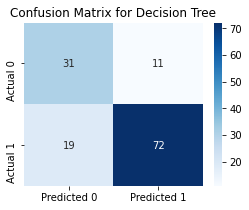



Model Name: Random Forest
Accuracy: 0.7969924812030075
Precision: 0.872093023255814
Recall: 0.8241758241758241
F1 Score: 0.847457627118644


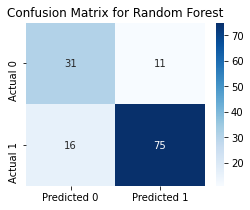



Model Name: Logistic Regression
Accuracy: 0.7443609022556391
Precision: 0.7821782178217822
Recall: 0.8681318681318682
F1 Score: 0.8229166666666666


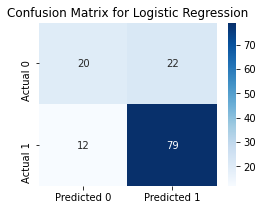



Model Name: Support Vector Machine
Accuracy: 0.7593984962406015
Precision: 0.780952380952381
Recall: 0.9010989010989011
F1 Score: 0.8367346938775511


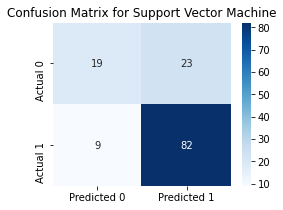



Model Name: K Nearest Neighbors
Accuracy: 0.7969924812030075
Precision: 0.8404255319148937
Recall: 0.8681318681318682
F1 Score: 0.8540540540540541


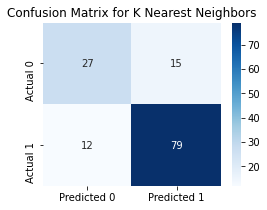

In [53]:
# plot confusion matrix for all models
for model_name, model in models_dict.items():
    plot_confusion_matrix(model_name, model, X_train, y_train, X_test, y_test)

In [54]:
# check results of CV evaluation
results2_df.sort_values(by='F1 Score', ascending=False).round(3)

,Model,Accuracy,Precision,Recall,F1 Score
1,Random Forest,0.797,0.805,0.797,0.800
4,K Nearest Neighbors,0.797,0.794,0.797,0.795
0,Decision Tree,0.774,0.789,0.774,0.779
3,Support Vector Machine,0.759,0.749,0.759,0.744
2,Logistic Regression,0.744,0.733,0.744,0.734




Model Name: Keras DNN
Accuracy: 0.7218045112781954
Precision: 0.8857142857142857
Recall: 0.6813186813186813
F1 Score: 0.7701863354037267


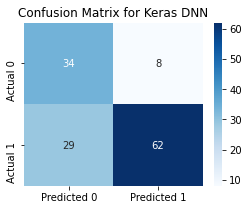

In [55]:
# DNN model
model = create_model(input_shape=(X_train.shape[1],), num_classes=2)

# train model
model.fit(X_train, to_categorical(y_train), epochs=20, batch_size=32, verbose=0)

# get predictions
y_pred = np.argmax(model.predict(X_test), axis=-1)

# scores
print(f'\n\nModel Name: Keras DNN')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')


# define empty lists to store scores
recall_scores2 = []
precision_scores2 = []
f1_scores2 = []
accuracy_scores2 = []
    
recall_scores2.append(recall_score(y_test, y_pred, average='weighted'))
precision_scores2.append(precision_score(y_test, y_pred, average='weighted'))
f1_scores2.append(f1_score(y_test, y_pred, average='weighted'))
accuracy_scores2.append(accuracy_score(y_test, y_pred))

if 'Keras DNN' not in results2_df['Model'].values:
    results2_df.loc[len(results2_df)] = ['Keras DNN', np.mean(accuracy_scores2), np.mean(precision_scores2), np.mean(recall_scores2), np.mean(f1_scores2)]


# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix for Keras DNN')
plt.show()


    


In [56]:
# LSTM model
lstm_model = create_lstm_model(input_shape=(X_train.shape[1], 1), num_classes=2)

# Reshape input data for LSTM
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# train model
lstm_model.fit(X_train_reshaped, to_categorical(y_train), epochs=20, batch_size=32, verbose=0)

# get predictions
y_pred = np.argmax(lstm_model.predict(X_test_reshaped), axis=-1)

# scores
print(f'\n\nModel Name: Keras LSTM')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')


# define empty lists to store scores
recall_scores2 = []
precision_scores2 = []
f1_scores2 = []
accuracy_scores2 = []
    
recall_scores2.append(recall_score(y_test, y_pred, average='weighted'))
precision_scores2.append(precision_score(y_test, y_pred, average='weighted'))
f1_scores2.append(f1_score(y_test, y_pred, average='weighted'))
accuracy_scores2.append(accuracy_score(y_test, y_pred))



# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix for Keras LSTM')
plt.show()

    
if 'Keras LSTM' not in results2_df['Model'].values:
    results2_df.loc[len(results2_df)] = ['Keras LSTM', np.mean(accuracy_scores2), np.mean(precision_scores2), np.mean(recall_scores2), np.mean(f1_scores2)]



AttributeError: 'DataFrame' object has no attribute 'reshape'

In [ ]:
# check results of CV evaluation
results2_df.sort_values(by='F1 Score', ascending=False).round(3)